<a href="https://colab.research.google.com/github/prajwalnigam321/Data-Science-and-Machine-Learning/blob/main/scaler_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="font-family:verdana; word-spacing:1.5px;">
<p style="background-color:#33e0ff;color:white;text-align:center;font-size:175%;padding: 10px;"> Introduction</p>
</div>    

<div style="font-family:verdana; word-spacing:1.5px;">
    
<b>Objective</b><br>
    
    
We are tasked to cluster them on the basis of their job profile, company, and other features.
    We are focused on profiling the best companies and job positions to work.
<br>   
    
<b>About the Dataset</b>   <br>
We are provided with the information for a segment of learners by Scaler, an online tech-versity.
    <br>
    Working as a data scientist with the analytics vertical of Scaler, we got this dataset from the Scaler database.<br><br>
      The dataset contains following features:
    <ul>
     <li> ‘Unnamed 0’- Index of the dataset
 <li>   Email_hash- Anonymised Personal Identifiable Information (PII)
 <li>   Company_hash- Current employer of the learner
 <li>   orgyear- Employment start date
 <li>   CTC- Current CTC
 <li>   Job_position- Job profile in the company
 <li>   CTC_updated_year: Year in which CTC got updated (Yearly increments, Promotions)

</ul><br>

<br><br>
    
<b>Concept Used :</b><br>
<ul>
    <li> Manual Clustering
    <li> Unsupervised Clustering - K- means, Hierarchical Clustering
</ul>

</div>  

In [7]:
import re
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [8]:
#Reading csv data
data = pd.read_csv('scaler_clustering.csv')

In [9]:
print("Dimensions of dataset ",data.shape)

data.head()

Dimensions of dataset  (205843, 7)


,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153281 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


<b> Checking for Null Values in dataset</b>

In [11]:
data.isna().sum()

Unnamed: 0              0
company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52562
ctc_updated_year        0
dtype: int64

<div style="display:fill;
           border-radius:5px;
           background-color:#BDE6ED;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;">
    Data contains null values in 4 columns [company, normalized_company_name, orgyear, job_position].
    </p>
    </div>

<b> Checking for Duplicate Rows in dataset</b>

In [12]:
len(data[data.duplicated()])


0

<div style="display:fill;
           border-radius:5px;
           background-color:#BDE6ED;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;">
    Data doesn't contain any duplicate rows.
    </p>
    </div>

<div style="font-family:verdana; word-spacing:1.5px;">
<p style="background-color:#33e0ff;color:white;text-align:center;font-size:175%;padding: 10px;"> Data Preprocessing</p>
</div>    

<b>Checking duplicated PII ids in column email_hash</b>

In [14]:
data['email_hash'].value_counts().head(10)

bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b    10
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c     9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee     9
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378     9
b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66     8
faf40195f8c58d5c7edc758cc725a762d51920da996410b80ac4a4d85c803da0     8
4818edfd67ed8563dde5d083306485d91d19f4f1c95d193a1700e79dd245b75c     8
c0eb129061675da412b0deb15871dd06ef0d7cd86eb5f7e8cc6a20b0d1938183     8
d598d6f1fb21b45593c2afc1c2f76ae9f4cb7167156cdf93246d4192a89d8065     8
d15041f58bb01c8ee29f72e33b136e26bc32f3169a40b53d75fe7ae9cbb9a551     8
Name: email_hash, dtype: int64

In [15]:
display(data[data['email_hash'] == 'bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b'])
display(data[data['email_hash'] == '6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c'])

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
24109,24129,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,NaN,2020.0
45984,46038,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,Support Engineer,2020.0
72315,72415,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,Other,2020.0
102915,103145,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,FullStack Engineer,2020.0
117764,118076,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,Data Analyst,2020.0
121483,121825,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,Other,2019.0
124476,124840,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,Support Engineer,2019.0
144479,145021,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,FullStack Engineer,2019.0
152801,153402,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,Devops Engineer,2019.0
159835,160472,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,NaN,2019.0


,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
9857,9859,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2400000,QA Engineer,2020.0
10002,10006,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2400000,Devops Engineer,2020.0
10583,10587,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2400000,Backend Engineer,2020.0
12784,12793,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2400000,Other,2020.0
20715,20729,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2400000,SDET,2020.0
138253,138731,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2000000,SDET,2020.0
159251,159887,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2000000,Devops Engineer,2020.0
165343,166040,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2000000,Other,2020.0
178749,179593,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2000000,Backend Engineer,2020.0


<div style="display:fill;
           border-radius:5px;
           background-color:#BDE6ED;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;">
    Apparently for single Anonymised Personal Identifiable Information (PII) id there exists multiple rows with same joining dates and company but different job positions, this couldn't be possible.<br><bbr>
    We will take the first row in case of duplicated PII ids.
    </p>
    </div>

In [16]:
data = data.groupby('email_hash').first().reset_index()

<b>Creating null value indicator columns (Feature Engineering)</b>

In [19]:
for i in ['orgyear','ctc_updated_year','company_hash','job_position']:
    data[i+'_na'] = data[i].isna()

<b>Cleaning text columns</b>

In [21]:
text_cols = ['company_hash']
for i in text_cols:
    data[i] = data[i].fillna('Not Available').apply(lambda x: re.sub('[^A-Za-z0-9 ]+', '', str(x).title()))

<b>Creating new columns (Feature Engineering)</b>

In [22]:
data['YoE'] = data['ctc_updated_year'] - data['orgyear']

<b>Frequency mean encoding</b>

In [25]:
feat = 'company_hash'
data[feat] = data[feat].fillna('na')
enc_nom = (data.groupby(feat).size()) / len(data)
data[feat+'_encode'] = data[feat].apply(lambda x : enc_nom[x])

feat = 'job_position'
data[feat] = data[feat].fillna('na')
enc_nom = (data.groupby(feat).size()) / len(data)*10000
data[feat+'_encode'] = data[feat].apply(lambda x : enc_nom[x])


<b>Reemoving Outliers from Orgyear column</b>

In [26]:
sorted(data['orgyear'].fillna(0).astype(int).unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 38,
 83,
 91,
 200,
 201,
 206,
 208,
 209,
 1900,
 1970,
 1971,
 1972,
 1973,
 1976,
 1977,
 1979,
 1981,
 1982,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023,
 2024,
 2025,
 2026,
 2027,
 2028,
 2029,
 2031,
 2101,
 2106,
 2107,
 2204,
 20165]

Removing future years, as this case is impossible to happen, also removing single digit years.

In [27]:
data = data[~data['orgyear'].isin([0,
 1,
 2,
 3,
 4,
 5,
 6,
 38,
 83,
 91,
 200,
 201,
 206,
 208,
 209,
 1900, 2023,
 2024,
 2025,
 2026,
 2027,
 2028,
 2029,
 2031,
 2101,
 2106,
 2107,
 2204,
 20165])]

In [28]:
data = data[~(data['YoE']<0)]

<div style="font-family:verdana; word-spacing:1.5px;">
<p style="background-color:#33e0ff;color:white;text-align:center;font-size:175%;padding: 10px;">EDA</p>
</div>    

<div style="font-family:verdana; word-spacing:1.5px;">
    <p style="text-align:center;font-size:125%;padding: 10px;"><b>Univariate Analysis</b></p>
    </div>

<b>Plotting Categorical Features</b>

In [34]:
categroical_columns = ['company_hash','job_position','orgyear','ctc_updated_year']

<ipython-input-35-a2ccd4143ef9>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = tmp.groupby(i).sum()['count'].reset_index().sort_values('count',ascending=False).head(15)


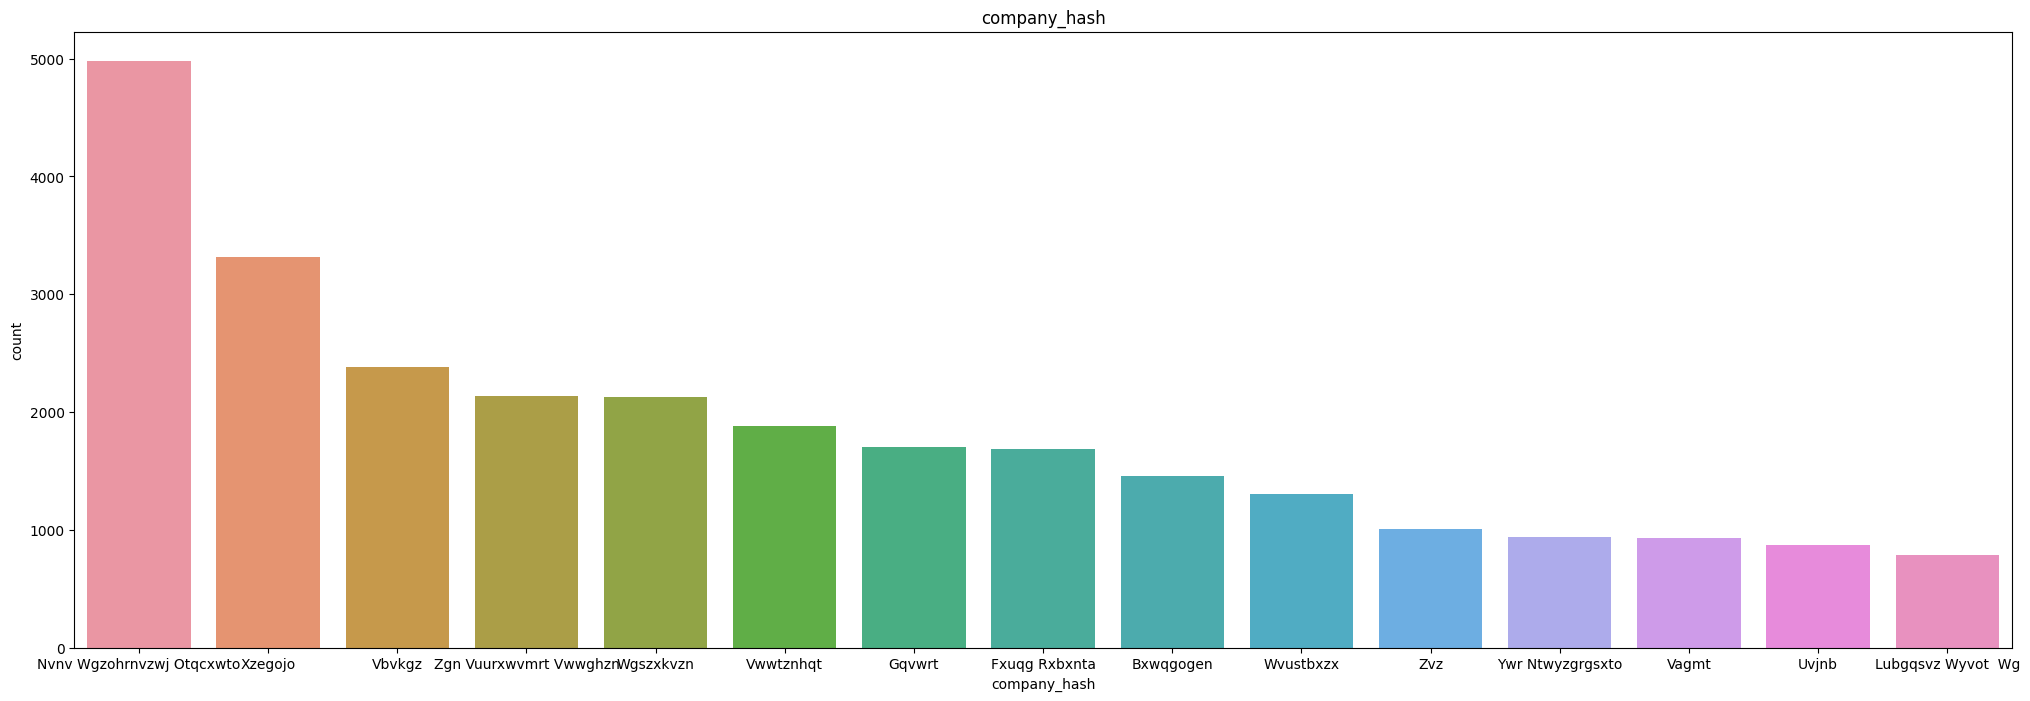

<ipython-input-35-a2ccd4143ef9>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = tmp.groupby(i).sum()['count'].reset_index().sort_values('count',ascending=False).head(15)


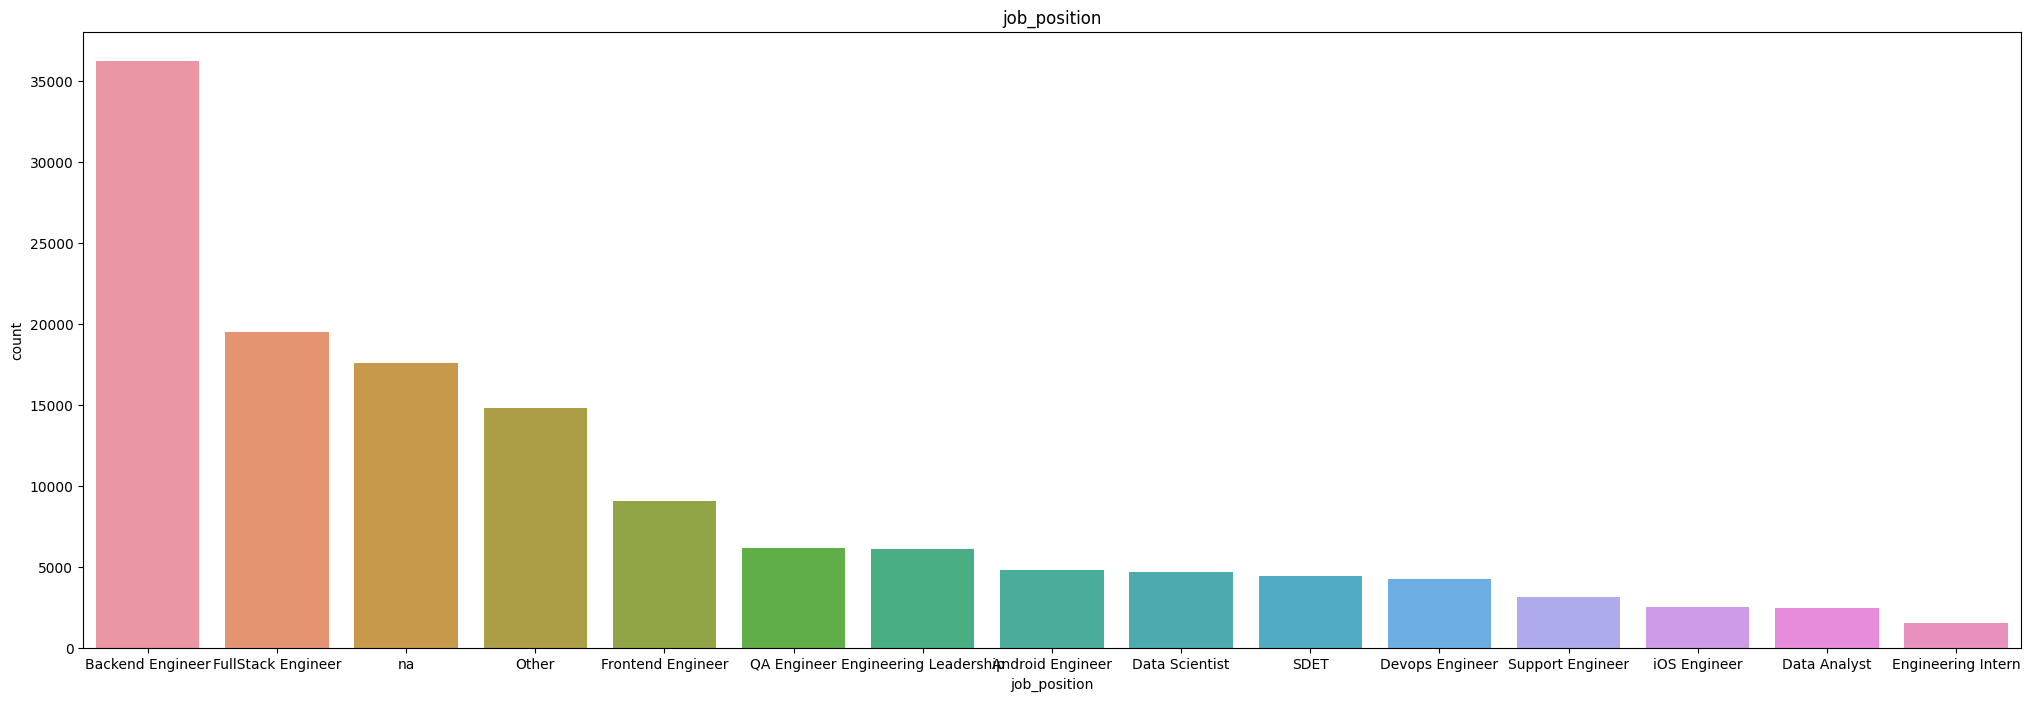

<ipython-input-35-a2ccd4143ef9>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = tmp.groupby(i).sum()['count'].reset_index().sort_values('count',ascending=False).head(15)


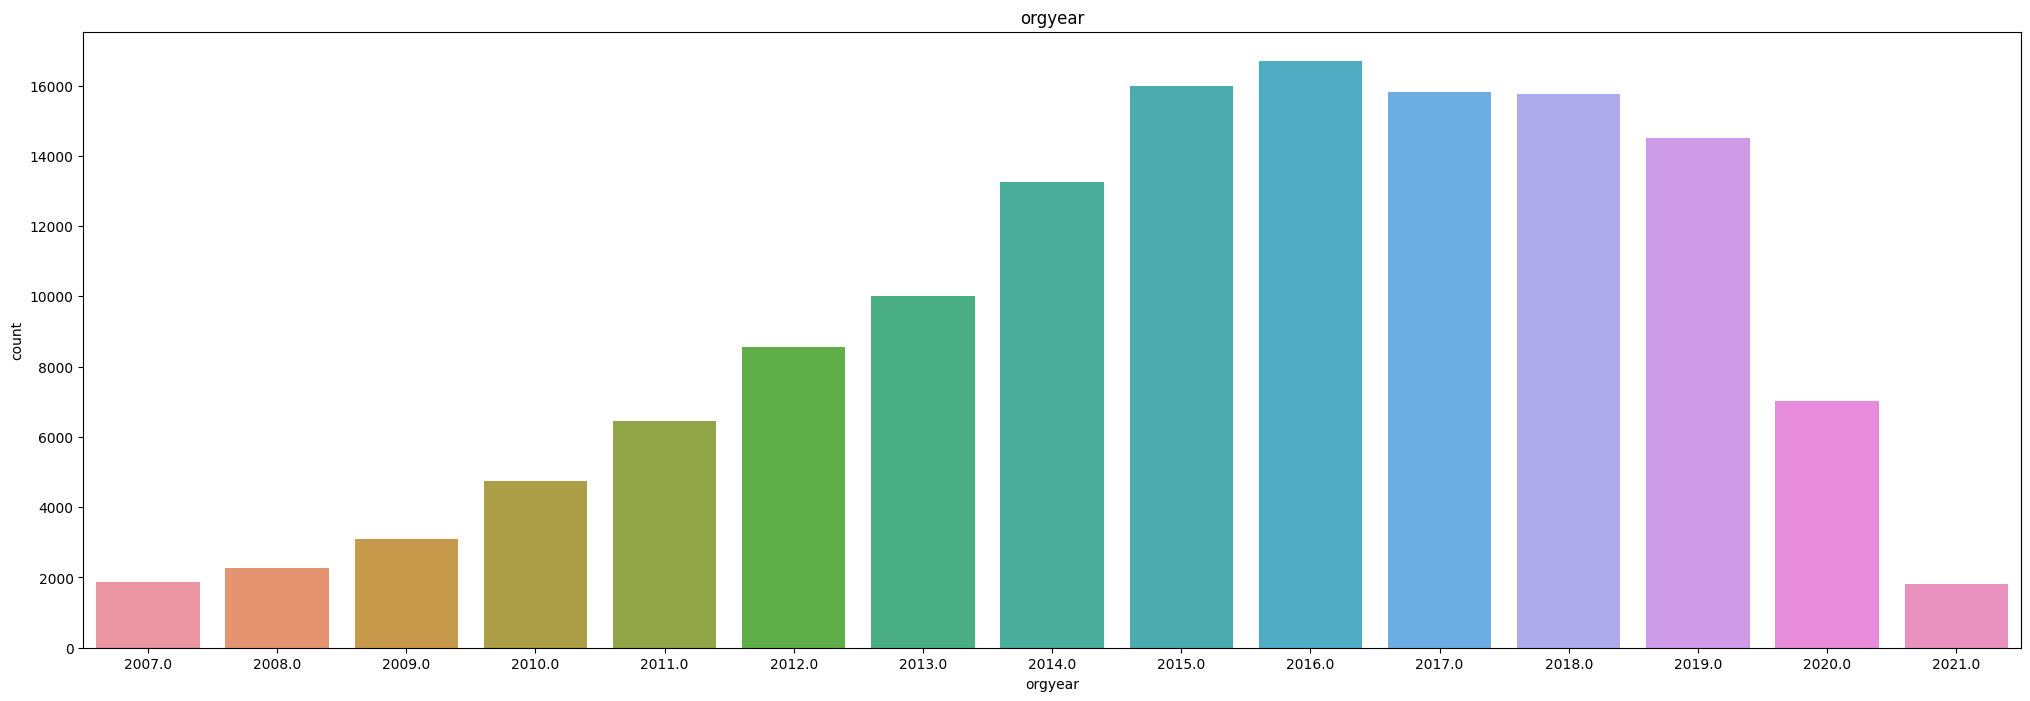

<ipython-input-35-a2ccd4143ef9>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = tmp.groupby(i).sum()['count'].reset_index().sort_values('count',ascending=False).head(15)


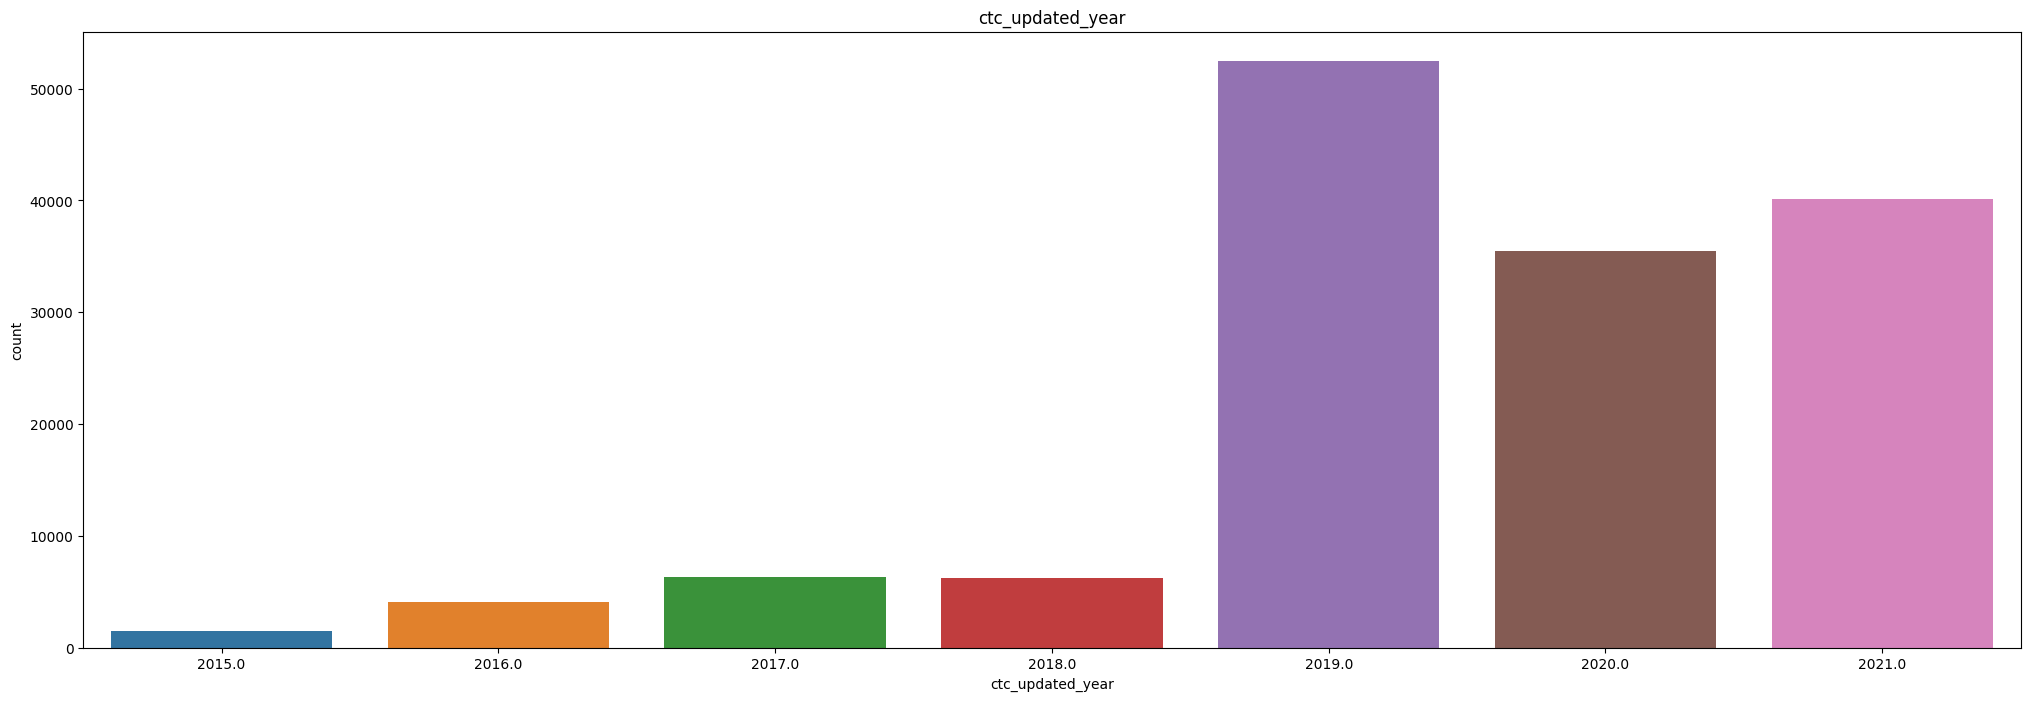

In [35]:
for i in categroical_columns:
    tmp = data.copy()
    tmp['count'] = 1
    tmp = tmp.groupby(i).sum()['count'].reset_index().sort_values('count',ascending=False).head(15)
    plt.figure(figsize=(25,8))
    sns.barplot(data=tmp,y='count',x=i).set(title=i)

    plt.show()


<b>Plotting Continuous Features</b>

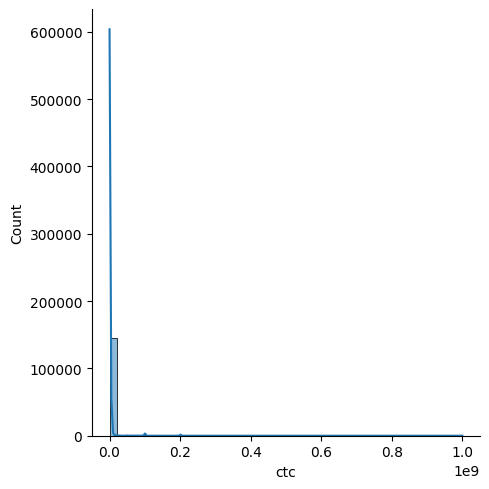

In [37]:
sns.displot(data['ctc'],kde=True,bins=50)
plt.show()

The plot seems to be having large range of values, let's try to scale column for visualizing.

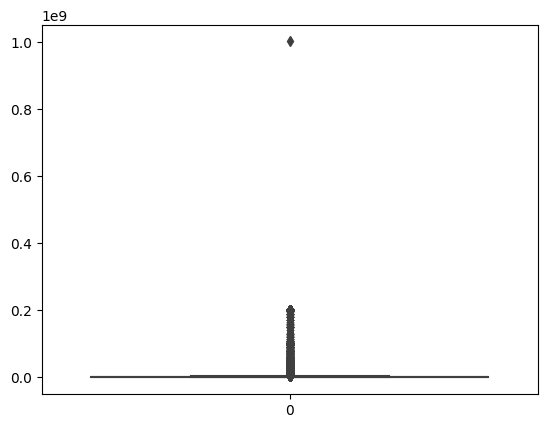

In [39]:
v = data['ctc']
#v = (v-v.mean())/v.std()
sns.boxplot(v)
plt.show()

In [40]:
data.sort_values(['ctc']).iloc[1000:1020,:]

,email_hash,Unnamed: 0,company_hash,orgyear,ctc,job_position,ctc_updated_year,orgyear_na,ctc_updated_year_na,company_hash_na,job_position_na,YoE,company_hash_encode,job_position_encode
40428,439134c4b243fe33a240265f94d0c9d6e120f31cb6e2cc...,98842,Trxztdn,2019.0,20000,QA Engineer,2019.0,False,False,False,False,0.0,0.000007,401.973371
30954,3394eeca520d9029ce6bd56e83faa5d4d82c396f453e2a...,97003,Mrvmmtq,2011.0,20000,Android Engineer,2019.0,False,False,False,False,8.0,0.000007,317.968236
78889,83d1ece927b7d7e944454483a4a8a3b08a18ed846890ee...,88544,Oxbgz Eqvotq Hzxctqoxnj,2016.0,20000,Other,2017.0,False,False,False,False,1.0,0.000026,1026.830810
90663,975e224e718de0d75c2d33d2bf24e75c4b7559664763b1...,125784,Wgcvrtzot Ntwyzgrgsxto,2016.0,20000,Backend Engineer,2019.0,False,False,False,False,3.0,0.000020,2431.717315
74910,7d43b749f1651cba0a16743d6235f5f32a9a58837ee081...,24380,Ovu,2008.0,20000,QA Engineer,2019.0,False,False,False,False,11.0,0.004112,401.973371
38801,40bf699c6ab3273acfdda2c7922b30dbc5f8cedea903f4...,93058,Zgzt,2008.0,20000,FullStack Engineer,2019.0,False,False,False,False,11.0,0.003395,1319.056588
25247,29e7d12a6225aeff7b5d92947f949e6646ec58111e5a5a...,4290,Vqttzv Bhrnxbtaxv,2001.0,20000,Other,2021.0,False,False,False,False,20.0,0.000007,1026.830810
117820,c4a7229bb63eade33516411b68d8501420e15987d116eb...,135189,Uyvqbtvoj,2012.0,20000,Backend Engineer,2019.0,False,False,False,False,7.0,0.000398,2431.717315
73669,7b3b93e56fd67d3ddfeb41f68a88a61d01c397aab9bbe1...,151028,Bvqxogen,2017.0,20000,na,2019.0,False,False,False,True,2.0,0.000007,1318.013855
71300,774a4a75a15f53e19bbf4ef85a5c6dc3da689e4291f773...,77722,Rxetonjrt Xzntqzvnxgzvr Ucn Rna,2010.0,20000,Other,2016.0,False,False,False,False,6.0,0.000007,1026.830810


In [41]:
data = data[data['ctc'] >702475]

<b> Outlier Removal using IQR</b>

In [42]:
dftmp = data.copy()
print(dftmp.shape)
cols = ['ctc'] # one or more

Q1 = dftmp[cols].quantile(0.25)
Q3 = dftmp[cols].quantile(0.75)
IQR = Q3 - Q1

dftmp = dftmp[~((dftmp[cols] < (Q1 - 1.5 * IQR)) |(dftmp[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(dftmp.shape)

(92558, 14)
(86464, 14)


In [43]:
#dftmp = dftmp[dftmp['ctc']>300000]

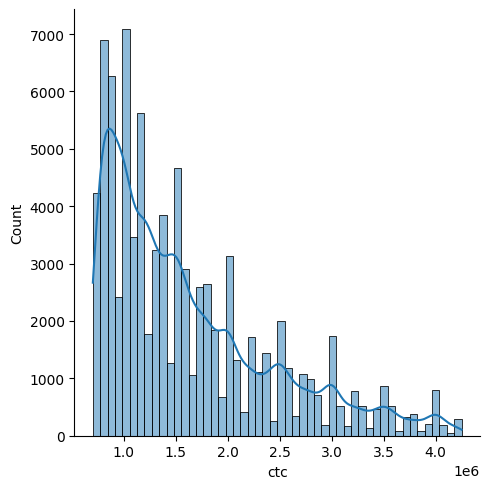

In [44]:
v = dftmp['ctc']
sns.displot(v,kde=True,bins=50)
plt.show()

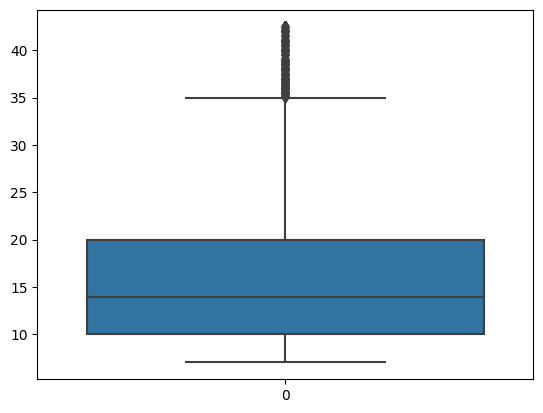

In [45]:
v = dftmp['ctc']/100000
#v = (v-v.mean())/v.std()
sns.boxplot(v)
plt.show()

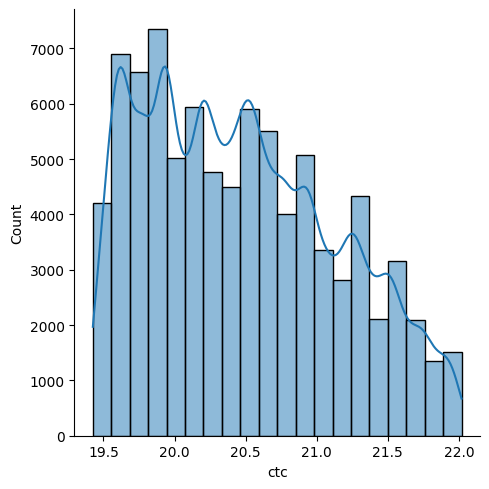

In [46]:
v = np.log2(dftmp['ctc'])
sns.displot(v,kde=True,bins=20)
plt.show()

In [47]:
dateda = dftmp.copy()

<div style="font-family:verdana; word-spacing:1.5px;">
    <p style="text-align:center;font-size:125%;padding: 10px;"><b>Multivariate Analysis</b></p>
    </div>

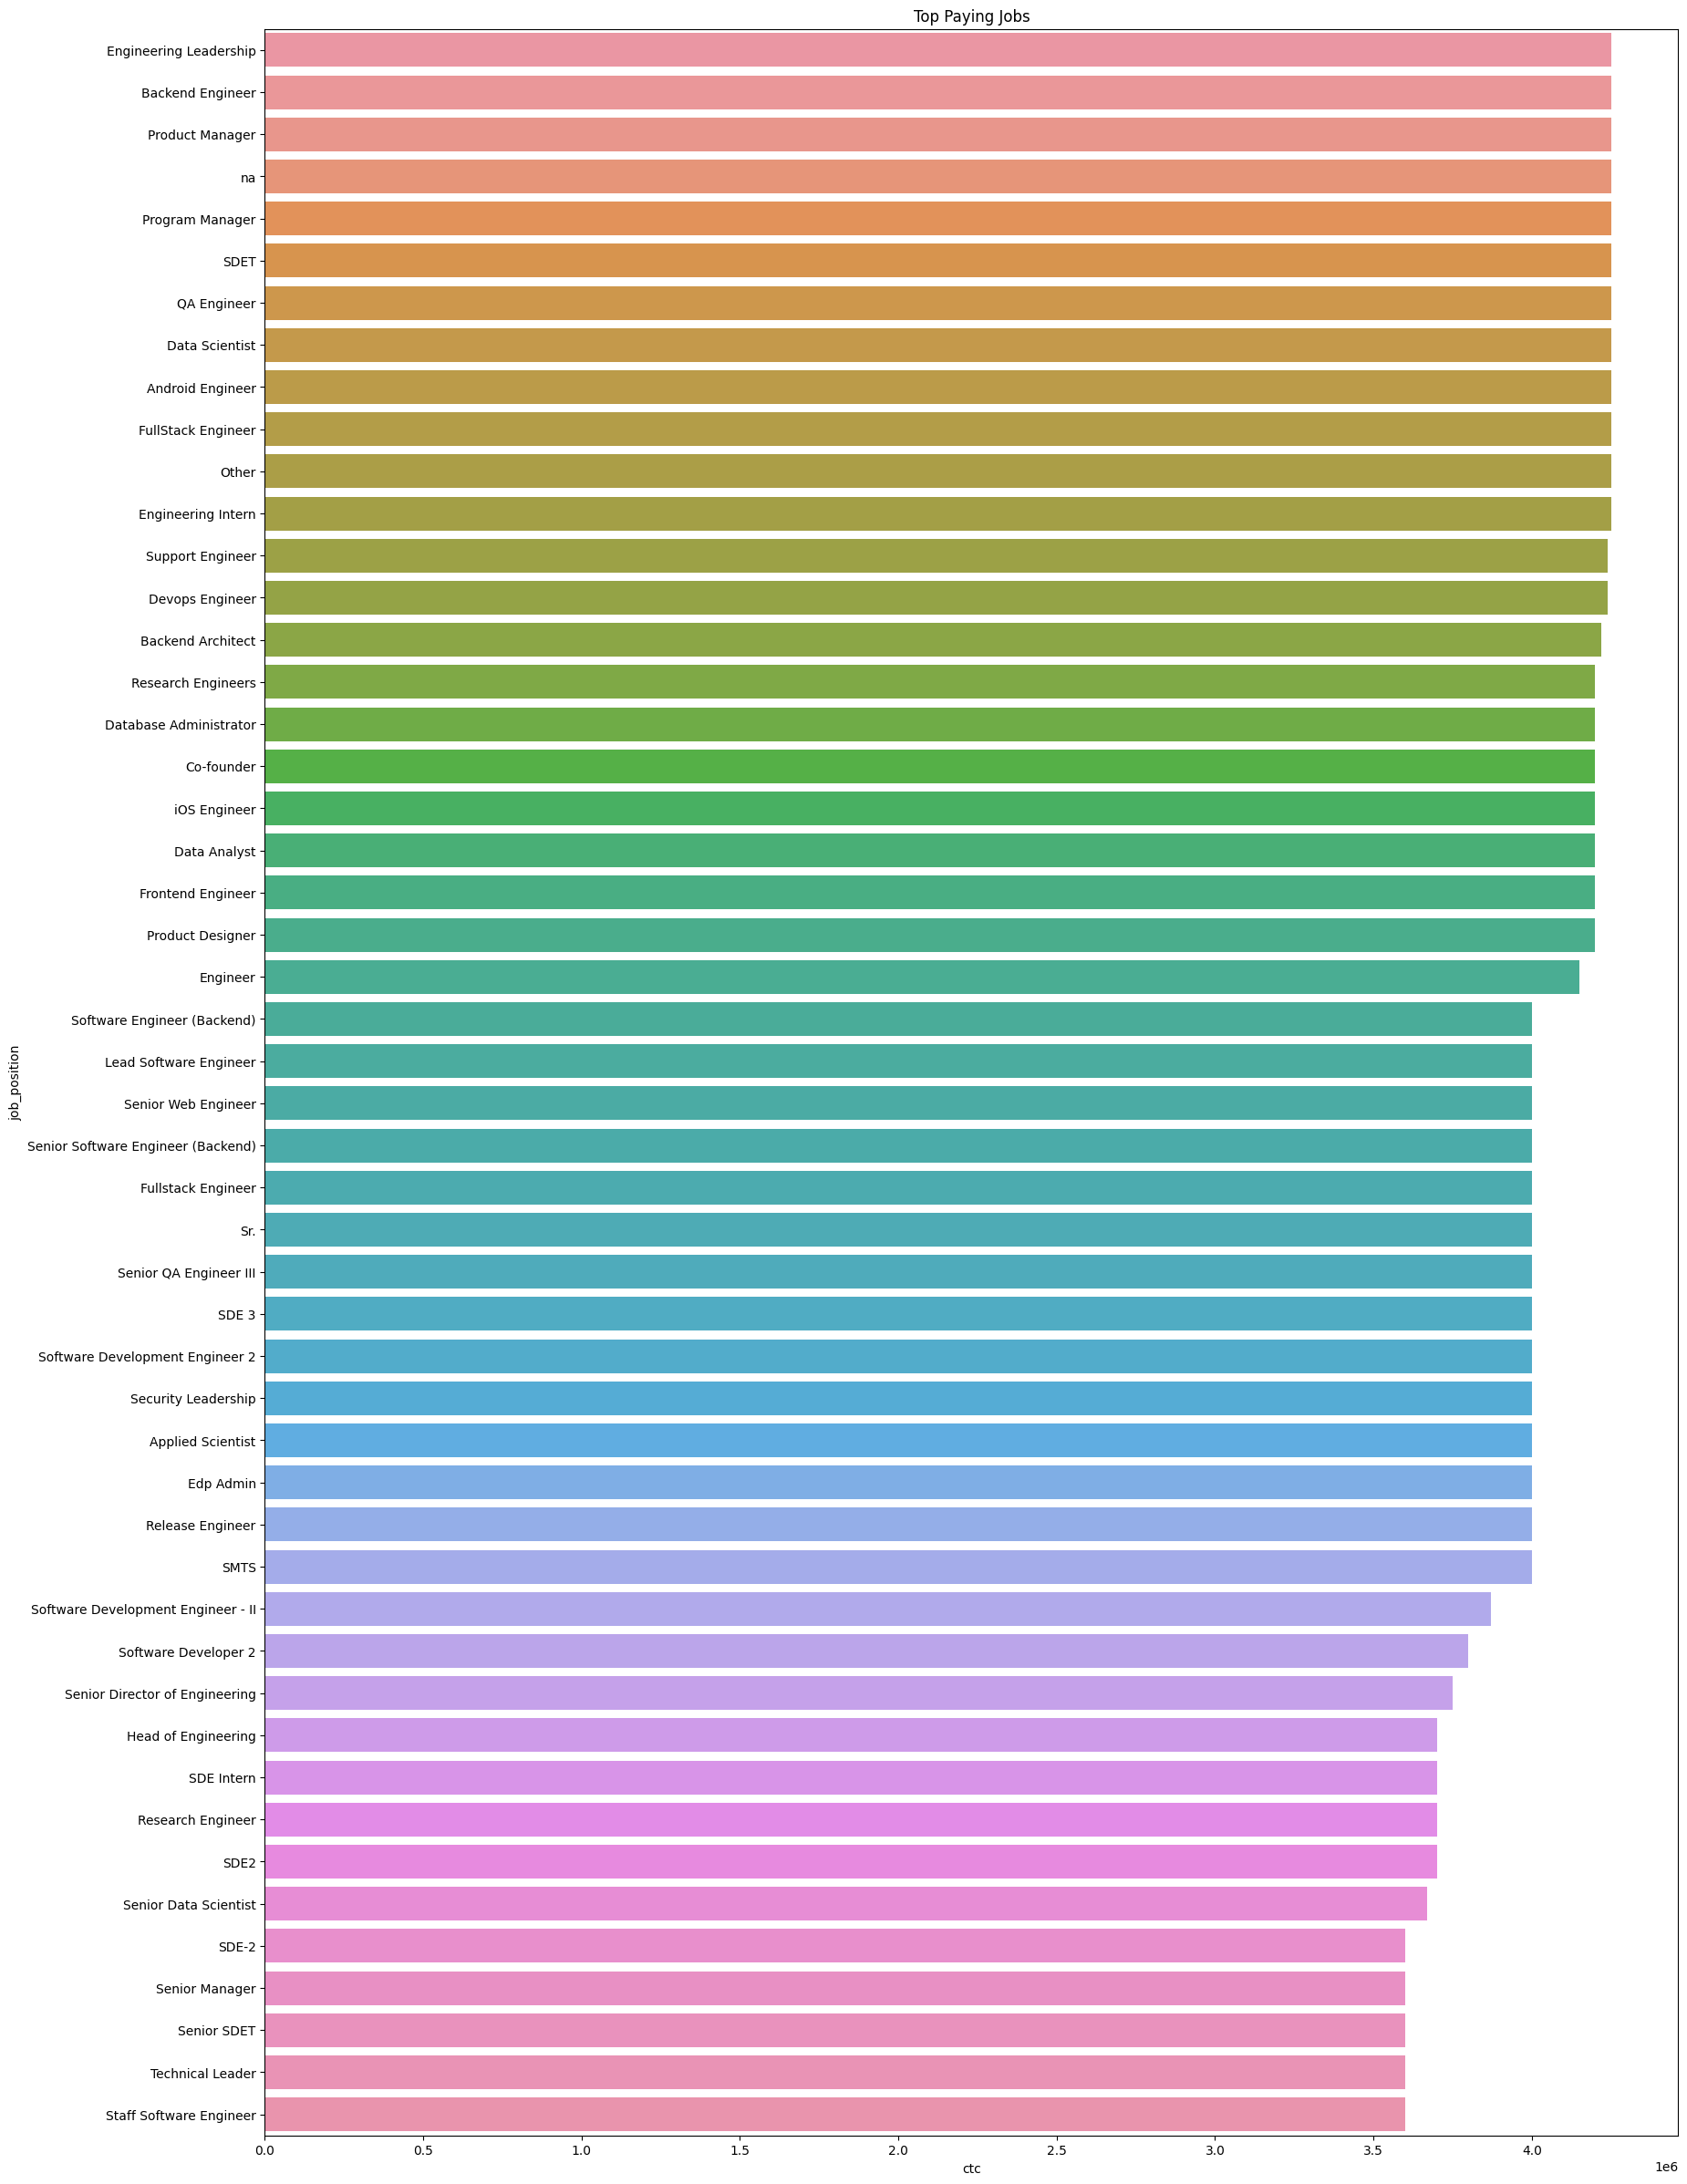

['Engineering Leadership',
 'Backend Engineer',
 'Product Manager',
 'na',
 'Program Manager',
 'SDET',
 'QA Engineer',
 'Data Scientist',
 'Android Engineer',
 'FullStack Engineer',
 'Other',
 'Engineering Intern',
 'Support Engineer',
 'Devops Engineer',
 'Backend Architect',
 'Research Engineers',
 'Database Administrator',
 'Co-founder',
 'iOS Engineer',
 'Data Analyst',
 'Frontend Engineer',
 'Product Designer',
 'Engineer',
 'Software Engineer (Backend)',
 'Lead Software Engineer',
 'Senior Web Engineer',
 'Senior Software Engineer (Backend)',
 'Fullstack Engineer',
 'Sr.',
 'Senior QA Engineer III',
 'SDE 3',
 'Software Development Engineer 2',
 'Security Leadership',
 'Applied Scientist',
 'Edp Admin',
 'Release Engineer',
 'SMTS',
 'Software Development Engineer - II',
 'Software Developer 2',
 'Senior Director of Engineering',
 'Head of Engineering',
 'SDE Intern',
 'Research Engineer',
 'SDE2',
 'Senior Data Scientist',
 'SDE-2',
 'Senior Manager',
 'Senior SDET',
 'Technica

In [48]:
tmp = dftmp.copy()
tmp = tmp.groupby(['job_position']).max()['ctc'].reset_index().sort_values('ctc',ascending=False).head(50)
plt.figure(figsize=(20,30))
sns.barplot(data=tmp,x='ctc',y='job_position').set(title="Top Paying Jobs")
plt.show()
list(tmp['job_position'])

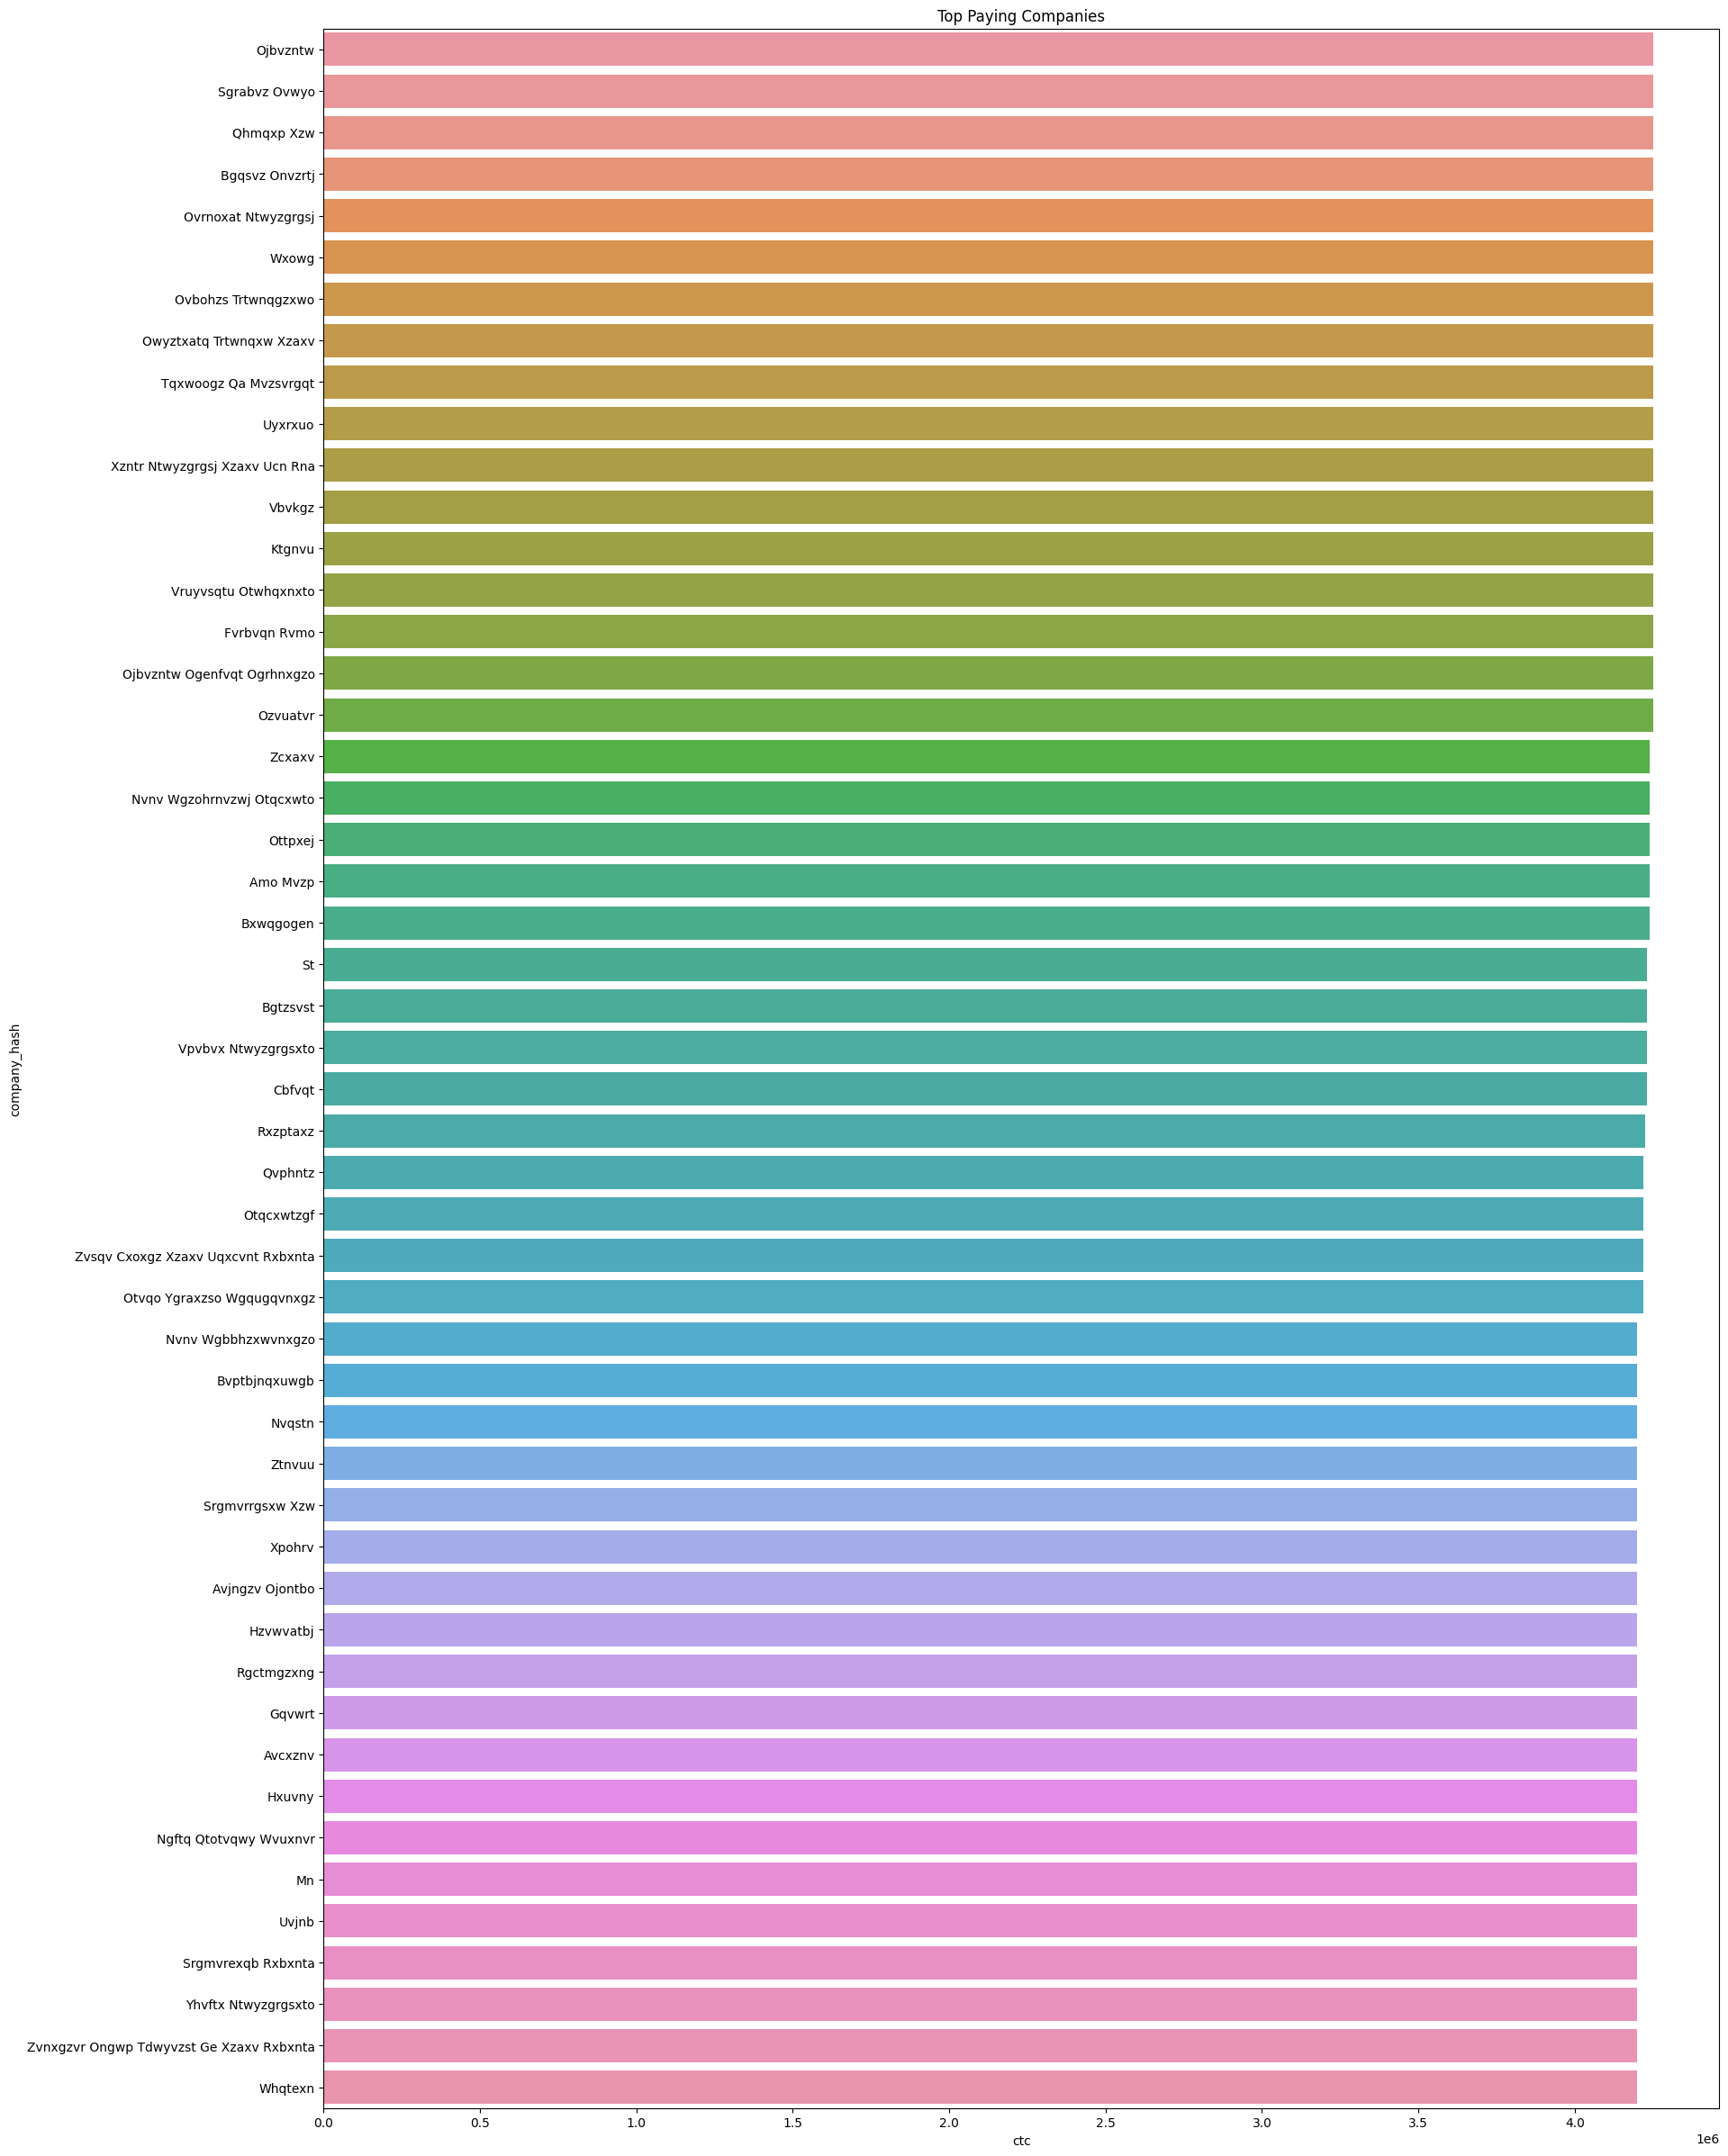

['Ojbvzntw',
 'Sgrabvz Ovwyo',
 'Qhmqxp Xzw',
 'Bgqsvz Onvzrtj',
 'Ovrnoxat Ntwyzgrgsj',
 'Wxowg',
 'Ovbohzs Trtwnqgzxwo',
 'Owyztxatq Trtwnqxw Xzaxv',
 'Tqxwoogz Qa Mvzsvrgqt',
 'Uyxrxuo',
 'Xzntr Ntwyzgrgsj Xzaxv Ucn Rna',
 'Vbvkgz',
 'Ktgnvu',
 'Vruyvsqtu Otwhqxnxto',
 'Fvrbvqn Rvmo',
 'Ojbvzntw Ogenfvqt Ogrhnxgzo',
 'Ozvuatvr',
 'Zcxaxv',
 'Nvnv Wgzohrnvzwj Otqcxwto',
 'Ottpxej',
 'Amo Mvzp',
 'Bxwqgogen',
 'St',
 'Bgtzsvst',
 'Vpvbvx Ntwyzgrgsxto',
 'Cbfvqt',
 'Rxzptaxz',
 'Qvphntz',
 'Otqcxwtzgf',
 'Zvsqv Cxoxgz Xzaxv Uqxcvnt Rxbxnta',
 'Otvqo Ygraxzso Wgqugqvnxgz',
 'Nvnv Wgbbhzxwvnxgzo',
 'Bvptbjnqxuwgb',
 'Nvqstn',
 'Ztnvuu',
 'Srgmvrrgsxw Xzw',
 'Xpohrv',
 'Avjngzv Ojontbo',
 'Hzvwvatbj',
 'Rgctmgzxng',
 'Gqvwrt',
 'Avcxznv',
 'Hxuvny',
 'Ngftq Qtotvqwy Wvuxnvr',
 'Mn',
 'Uvjnb',
 'Srgmvrexqb Rxbxnta',
 'Yhvftx Ntwyzgrgsxto',
 'Zvnxgzvr Ongwp Tdwyvzst Ge Xzaxv Rxbxnta',
 'Whqtexn']

In [51]:
tmp = dftmp.copy()
tmp = tmp.groupby(['company_hash']).max()['ctc'].reset_index().sort_values('ctc',ascending=False).head(50)
plt.figure(figsize=(20,30))
sns.barplot(data=tmp,x='ctc',y='company_hash').set(title="Top Paying Companies")
plt.show()

list(tmp['company_hash'])

<ipython-input-53-8dc16903bc69>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = tmp.groupby(['orgyear']).mean()['ctc'].reset_index().sort_values('ctc',ascending=False).head(50)


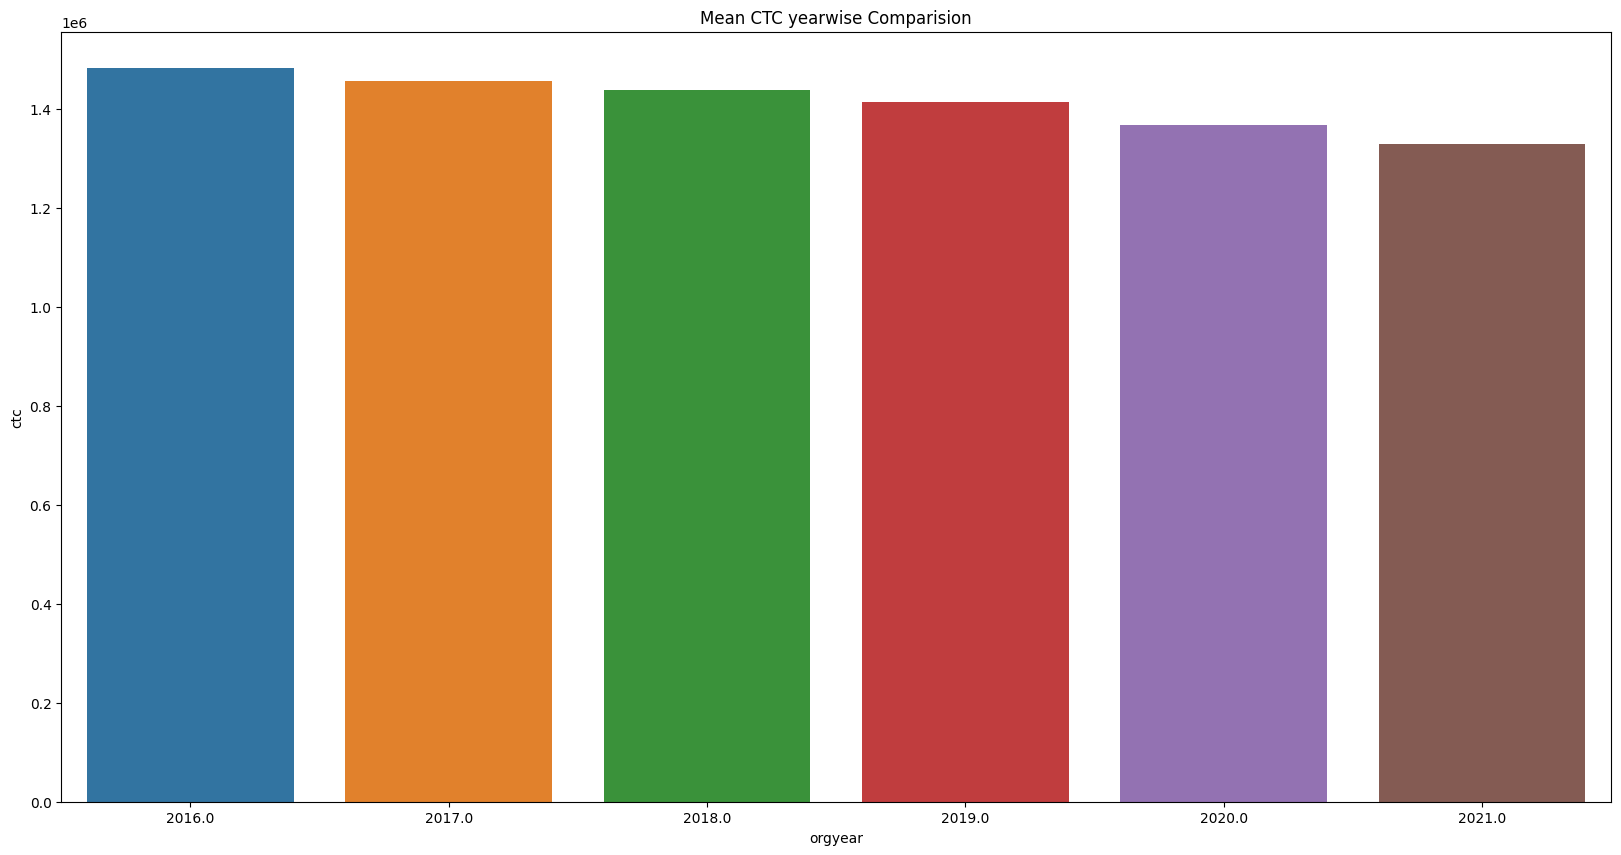

In [53]:
tmp = dftmp.copy()

tmp = tmp[tmp['orgyear'] >= 2016]
tmp = tmp.groupby(['orgyear']).mean()['ctc'].reset_index().sort_values('ctc',ascending=False).head(50)
plt.figure(figsize=(20,10))
sns.barplot(data=tmp,y='ctc',x='orgyear').set(title="Mean CTC yearwise Comparision")
plt.show()



<div style="font-family:verdana; word-spacing:1.5px;">
    <p style="text-align:center;font-size:175%;padding: 10px;"><b> Manual Clustering</b></p>
    </div>

In [55]:
grp = ['company_hash','job_position','YoE']
data_tmp1 = dateda.groupby(grp).agg({'ctc':['mean','median','min','max','count']}).reset_index()
data_tmp1.columns  = ["{} {}".format(b_, a_) if a_ not in grp else "{}".format(a_) for a_, b_ in zip(data_tmp1.columns.droplevel(1), data_tmp1.columns.droplevel(0))  ]
data_tmp1.head(100).tail(50)

datatmp = dateda.merge(data_tmp1[['company_hash', 'job_position', 'YoE', 'mean ctc']],on=['company_hash', 'job_position', 'YoE'],how='left')



col1 = 'ctc'
col2 = 'mean ctc'
conditions  = [ datatmp[col1] > datatmp[col2], datatmp[col1] == datatmp[col2], datatmp[col1] < datatmp[col2] ]
choices     = [ 1, 2, 3 ]

datatmp['Designation'] = np.select(conditions, choices, default=np.nan)


In [56]:
grp = ['company_hash','job_position']
data_tmp1 = datatmp.groupby(grp).agg({'ctc':[('mean2','mean'),'median','min','max','count']}).reset_index()
data_tmp1.columns  = ["{} {}".format(b_, a_) if a_ not in grp else "{}".format(a_) for a_, b_ in zip(data_tmp1.columns.droplevel(1), data_tmp1.columns.droplevel(0))  ]
data_tmp1.head(100).tail(50)


datatmp = datatmp.merge(data_tmp1[grp + ['mean2 ctc']],on=grp,how='left')


col1 = 'ctc'
col2 = 'mean2 ctc'
conditions  = [ datatmp[col1] > datatmp[col2], datatmp[col1] == datatmp[col2], datatmp[col1] < datatmp[col2] ]
choices     = [ 1, 2, 3 ]

datatmp['Class'] = np.select(conditions, choices, default=np.nan)

In [57]:
grp = ['company_hash']
data_tmp1 = datatmp.groupby(grp).agg({'ctc':[('mean3','mean'),'median','min','max','count']}).reset_index()
data_tmp1.columns  = ["{} {}".format(b_, a_) if a_ not in grp else "{}".format(a_) for a_, b_ in zip(data_tmp1.columns.droplevel(1), data_tmp1.columns.droplevel(0))  ]
data_tmp1.head(100).tail(50)


datatmp = datatmp.merge(data_tmp1[grp + ['mean3 ctc']],on=grp,how='left')


col1 = 'ctc'
col2 = 'mean3 ctc'
conditions  = [ datatmp[col1] > datatmp[col2], datatmp[col1] == datatmp[col2], datatmp[col1] < datatmp[col2] ]
choices     = [ 1, 2, 3 ]

datatmp['Tier'] = np.select(conditions, choices, default=np.nan)

In [58]:
datatmp['diff_desig'] = datatmp['ctc'] - datatmp['mean ctc']
datatmp['diff_class'] = datatmp['ctc'] - datatmp['mean2 ctc']
datatmp['diff_tier'] = datatmp['ctc'] - datatmp['mean3 ctc']

<div style="font-family:verdana; word-spacing:1.5px;">
    <p style="text-align:center;font-size:175%;padding: 10px;"><b>Answering question based on manual clustering</b></p>
    </div>
    

<b>Top 10 employees (earning more than most of the employees in the company) - Tier 1 </b>

In [59]:
datatmp[datatmp['Tier'] == 1].sort_values('diff_tier',ascending=False).head(10)[['email_hash','ctc','mean3 ctc']]

,email_hash,ctc,mean3 ctc
76180,e15abfd41c005995728191e49ef001e83e813cd3ed5104...,4240000,1.051315e+06
49030,90d5114ca752c55babef2c517ac8b17aaee3d9ff5740de...,4200000,1.051315e+06
59575,b022b84623593cc38a3c1d39d4545b368a7b5f286be1c7...,4200000,1.051315e+06
54761,a1c1c8919e2918b24241a40271e02381daf199c61d7a3b...,4200000,1.143837e+06
70667,d13d7376e9ced16b4e250d0643f9139f8b36a62847f71b...,4200000,1.147773e+06
31649,5d872e52cb535a71fc75a5a97e779bb4c1554d0baa920d...,4200000,1.158025e+06
14808,2b10e1d996c6ab5e175eea35ca25ea7afbaacd1237ab64...,4200000,1.158025e+06
47727,8d0ed00904247626f5557f5983feeb5a0567d7726eea39...,4200000,1.176534e+06
31826,5dff6a65d548553262b6a289f014b2b72a5d47ff6dfa5c...,4170000,1.165011e+06
45627,86b90dd64ddb663ea35be98422947a01ba9ab837fb76df...,4000000,1.051315e+06


<b>Top 10 employees of data science in Amazon / TCS etc earning more than their peers - Class 1</b>

In [60]:
datatmp[(datatmp['Tier'] == 1)&(datatmp['Class'] == 1)&(datatmp['job_position'].isin(['Data Science Analyst','Data Scientist','Data Scientist II','Associate Data Scientist','Senior Data Scientist']))].sort_values('diff_class',ascending=False).head(10)[['email_hash','ctc','mean2 ctc']]

,email_hash,ctc,mean2 ctc
81289,f04a0228e5af6f8f6ecc33e089892e80d85b3c749b3244...,4000000,1.533750e+06
56231,a63f3f44de7586430615a8a9bd13d41e7b0d541ca0f690...,4200000,1.862000e+06
16846,31616edfc502824631b11793313d35d5bb2288319dcb25...,3800000,1.513842e+06
21441,3efbb8c4d67b4a4c6ba4c639cd84e9ff98b85d5f57d82f...,3979999,1.716000e+06
33512,62f705ba342cb9e51117446a5522c2e42c14db27b9b20e...,4250000,2.025000e+06
83396,f67ae342b7431f7ab05eca998d904647b02711538aa839...,3750000,1.565556e+06
83524,f6e8c41a40ec308c996d498e22729359d2b564cae037a0...,3500000,1.410000e+06
191,009ded427ebcb5c2fb1970017a683693a7abef0fa96f5e...,3900000,1.834333e+06
79529,eb35a5d34977c6135372e46d6cc4f85332f1a4f9578bd5...,4080000,2.020000e+06
36086,6aa8cfeb5b98da66158e0af4ca8869362174abdba84a02...,3200000,1.233235e+06


<b> Bottom 10 employees of data science in Amazon / TCS etc earning less than their peers - Class 3</b>

In [61]:
datatmp[(datatmp['Tier'] == 1)&(datatmp['Class'] == 3)&(datatmp['job_position'].isin(['Data Science Analyst','Data Scientist','Data Scientist II','Associate Data Scientist','Senior Data Scientist']))].sort_values('diff_class',ascending=True).head(10)[['email_hash','ctc','mean2 ctc']]

,email_hash,ctc,mean2 ctc
14514,2a3136f6e2d03a3dbfa3f683e4ae1b744b4815a8e0177c...,1700000,3125000.0
55794,a4f1770283497277f8cd3b7cb04e9b5c3135815eebb4cf...,2300000,3292500.0
48870,9069f6772b1e7959734a115bf49b2168a888608496af50...,1900000,2850000.0
82770,f49bd18e7fe914929f6cc23bb4e7979d58290119f2adcf...,1600000,2500000.0
51648,987a063524741381c302a096e4b019f46088e519f59f4a...,2000000,2750000.0
65945,c371eff30d6983ab69401441f359fed64397f7699c7aff...,1630000,2350000.0
79574,eb5552cf683e3072a7e2e2c6e63ebb46183a716b2bd2a1...,1780000,2496000.0
2812,080c3b2cc8fe9e7743520a3771a3b4db72e49ef2542ebf...,1400000,1986000.0
26908,4fcbc73fbd3da62f8750d69c13846ada4d1302f4817865...,1700000,2250000.0
61631,b63f00fbd2f8774eccde057bbf3f99ae1742adf496b2cc...,1600000,2102500.0


<b> Bottom 10 employees (earning less than most of the employees in the company)- Tier 3</b>

In [62]:
datatmp[datatmp['Tier'] == 3].sort_values('diff_tier',ascending=True).head(10)[['email_hash','ctc','mean3 ctc']]

,email_hash,ctc,mean3 ctc
12121,2322345290a1926df62347d45f06b68932e219cb010bf8...,850000,3.262923e+06
64065,bda6e0f742115289a27f304078935331a5563d90c91461...,750000,2.929000e+06
15908,2e7e946b56a245338d8da1daf60ef851031c9964cffd25...,950000,2.950000e+06
4334,0c535bb44414d62cab133425339bd7e156ec79823899ae...,810000,2.770000e+06
73476,d96a6540ff59456abe30f51f68e954388b1f6922c4bb0c...,900000,2.840543e+06
49904,935480e039d80833292d858a553a4bc0f628b9b97ce9ec...,900000,2.840543e+06
19346,38d71a484d7663f7c14df8432620bbbab718933173a295...,1368000,3.262923e+06
70292,d034e386dbce817ee1ea099b161379d3341af0a16573d8...,800000,2.683125e+06
36006,6a6d1a4452505b678e264700fd0c28f247c4522d27f112...,770000,2.637273e+06
2612,077fd3f95d8dbf89c112a8eca6601db3729f51b53b57a0...,720000,2.577054e+06


<b> Top 10 companies (based on their CTC)</b>

In [66]:
datatmp.groupby('company_hash').mean()['ctc'].reset_index().sort_values('ctc',ascending=False).head(10)[['company_hash','ctc']]

<ipython-input-66-e252ba0d71bd>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  datatmp.groupby('company_hash').mean()['ctc'].reset_index().sort_values('ctc',ascending=False).head(10)[['company_hash','ctc']]


,company_hash,ctc
12498,Tqxwoogz Qa Mvzsvrgqt,4250000.0
9063,Ovrnoxat Ntwyzgrgsj,4250000.0
19694,Zvsqv Cxoxgz Xzaxv Uqxcvnt Rxbxnta,4220000.0
6183,Mvqntqerjxg,4200000.0
5527,Lxeert Ntwyzgrgsxto,4200000.0
14758,Vrjgoyv Ntwyzgrgsj Wgzohrnvzwj Otqcxwt,4200000.0
7735,Obvqnmxnuxdtr Ntwy Ucn Rna,4200000.0
9208,Owm,4200000.0
6559,Nhqmgyxqt,4200000.0
3186,Ertwp,4200000.0


<b> Top 2 positions in every company (based on their CTC)</b>

In [68]:
tmp = datatmp[datatmp['job_position'] != 'na']
tmp = tmp.groupby(['company_hash','job_position']).mean().sort_values(['company_hash','ctc']).reset_index()
tmp = tmp.groupby('company_hash').head(2)[['company_hash','job_position']]
tmp

<ipython-input-68-ef234a50487a>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = tmp.groupby(['company_hash','job_position']).mean().sort_values(['company_hash','ctc']).reset_index()


,company_hash,job_position
0,01 Ojztqsj,Frontend Engineer
1,05Mz Exzytvrny Uqxcvnt Rxbxnta,Backend Engineer
2,1 Jtvq,Backend Engineer
3,10 Axsxnvr Ahmvx Rgzagz,Android Engineer
4,1001 Vuuo,Frontend Engineer
...,...,...
32650,Zxzvzxjv Sqghu,Engineering Leadership
32651,Zyuw Rxbxnta,Frontend Engineer
32652,Zyvzwt Wgzohrnxzs Tzsxzttqo,Frontend Engineer
32653,Zz,Other


<div style="font-family:verdana; word-spacing:1.5px;">
<p style="background-color:#33e0ff;color:white;text-align:center;font-size:175%;padding: 10px;">Preparing data for training model(Imputation/Scaling)</p>
</div>    

In [69]:
data = dateda.copy()
data

,email_hash,Unnamed: 0,company_hash,orgyear,ctc,job_position,ctc_updated_year,orgyear_na,ctc_updated_year_na,company_hash_na,job_position_na,YoE,company_hash_encode,job_position_encode
0,00003288036a44374976948c327f246fdbdf0778546904...,84782,Bxwqgogen,2012.0,3500000,Backend Engineer,2019.0,False,False,False,False,7.0,0.010160,2431.717315
3,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,53905,Bxwqgotbx Wgqugqvnxgz,2004.0,2000000,FullStack Engineer,2021.0,False,False,False,False,17.0,0.000072,1319.056588
4,00014d71a389170e668ba96ae8e1f9d991591acc899025...,138707,Fvrbvqn Rvmo,2009.0,3400000,na,2018.0,False,False,False,True,9.0,0.003760,1318.013855
6,00022dc29c7f77032275182b883d4f273ea1007aefc437...,7782,Xzeqvwrgha Ntwyzgrgsxto,2016.0,750000,Frontend Engineer,2019.0,False,False,False,False,3.0,0.000026,604.263472
7,00036c2c5212d88d07acdc5bda7eef5653f8b09bbe30b7...,30543,Ocu Xnivz Gbvz,2011.0,2300000,Other,2021.0,False,False,False,False,10.0,0.000007,1026.830810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153432,fffa3a7b849802580a1972f11d192b43ff1c871bb43002...,79890,Nvnv Wgzohrnvzwj Otqcxwto,2014.0,1800000,Backend Engineer,2019.0,False,False,False,False,5.0,0.034221,2431.717315
153438,fffc254e627e4bd1bc0ed7f01f9aebbba7c3cc56ac914e...,39683,Tqxwoogz Ogenfvqt Wvbuho,2004.0,3529999,QA Engineer,2019.0,False,False,False,False,15.0,0.000007,401.973371
153439,fffcf97db1e9c13898f4eb4cd1c2fe862358480e104535...,186656,Trnqvcg,2015.0,1600000,na,2018.0,False,False,False,True,3.0,0.000007,1318.013855
153440,fffe7552892f8ca5fb8647d49ca805b72ea0e9538b6b01...,148878,Znn Avnv Srgmvr Atrxctqj Otqcxwto,2014.0,900000,Devops Engineer,2019.0,False,False,False,False,5.0,0.000124,279.908500


<b>Transforming ctc feature using log function</b>

In [70]:
data['ctc_log'] = np.log2(data['ctc'])

<b> Columns like ['job_position','email_hash','Unnamed: 0','company'] are text.<br> We can't use them during imputation, so we'll remove these columns</b>

In [72]:
drop_cols = ['job_position','email_hash','Unnamed: 0','company_hash']
for i in drop_cols:
    try:
        data.drop([i],axis=1,inplace=True)
    except:
        print('no')

no
no
no


In [73]:
data.columns

Index(['orgyear', 'ctc', 'ctc_updated_year', 'orgyear_na',
       'ctc_updated_year_na', 'company_hash_na', 'job_position_na', 'YoE',
       'company_hash_encode', 'job_position_encode', 'ctc_log'],
      dtype='object')

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86464 entries, 0 to 153442
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   orgyear              86424 non-null  float64
 1   ctc                  86464 non-null  int64  
 2   ctc_updated_year     86464 non-null  float64
 3   orgyear_na           86464 non-null  bool   
 4   ctc_updated_year_na  86464 non-null  bool   
 5   company_hash_na      86464 non-null  bool   
 6   job_position_na      86464 non-null  bool   
 7   YoE                  86424 non-null  float64
 8   company_hash_encode  86464 non-null  float64
 9   job_position_encode  86464 non-null  float64
 10  ctc_log              86464 non-null  float64
dtypes: bool(4), float64(6), int64(1)
memory usage: 7.6 MB


<b>Summary Statistics</b>

In [75]:
data.describe()

,orgyear,ctc,ctc_updated_year,YoE,company_hash_encode,job_position_encode,ctc_log
count,86424.000000,8.646400e+04,86464.000000,86424.000000,86464.000000,86464.000000,86464.000000
mean,2013.804626,1.626541e+06,2019.441432,5.636906,0.002635,1209.710671,20.474913
std,4.354664,8.080584e+05,1.283791,4.225522,0.005558,878.503304,0.662649
min,1970.000000,7.040000e+05,2015.000000,0.000000,0.000007,0.065171,19.425216
25%,2012.000000,1.000000e+06,2019.000000,3.000000,0.000033,319.141310,19.931569
50%,2015.000000,1.400000e+06,2019.000000,5.000000,0.000371,1318.013855,20.416995
75%,2017.000000,2.000000e+06,2020.000000,8.000000,0.002170,2431.717315,20.931569
max,2021.000000,4.250000e+06,2021.000000,51.000000,0.034221,2431.717315,22.019031


In [76]:
data.isna().sum()

orgyear                40
ctc                     0
ctc_updated_year        0
orgyear_na              0
ctc_updated_year_na     0
company_hash_na         0
job_position_na         0
YoE                    40
company_hash_encode     0
job_position_encode     0
ctc_log                 0
dtype: int64

<div style="font-family:verdana; word-spacing:1.5px;">
<p style="background-color:#33e0ff;color:white;text-align:center;font-size:175%;padding: 10px;">Training Model</p>
</div>    

In [77]:
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

<div style="font-family:verdana; word-spacing:1.5px;">
    <p style="text-align:center;font-size:175%;padding: 10px;"><b>Kmeans clustering</b></p>
    </div>
    

<div style="font-family:verdana; word-spacing:1.5px;">
    Standardizing data before applyting unsupervised algorithm can have consequences as stated in question,
    <br><br>
<p>
     <i>"Should the observations or features first be standardized in some way?"</i>
    </p>
   
</div>    


 -[Page 399, Introduction to Statistiical Learning](http://www.statlearning.com/s/ISLR-Seventh-Printing.pdf)


So we will be training a model with unscaled features too.

In [78]:
pipe_knn = Pipeline([('scaler', StandardScaler()), ('knn_imputer',  KNNImputer(n_neighbors=2, weights="uniform"))])
pipe_knn_5 = Pipeline([('scaler', StandardScaler()), ('knn_imputer',  KNNImputer(n_neighbors=5, weights="uniform"))])
pipe = Pipeline([('scaler', StandardScaler()), ('simple_imputer',  SimpleImputer(missing_values=np.nan, strategy='mean'))])
pipe_knn_pca = Pipeline([('scaler', StandardScaler()), ('knn_imputer',  KNNImputer(n_neighbors=2, weights="uniform")),('pca',PCA(n_components=8))])
pipe_unscaled = Pipeline([('knn_imputer',  KNNImputer(n_neighbors=5, weights="uniform"))])


<b> Finding optimal num of clusters using Elbow method</b>

Running for  KNN Immputation


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: 

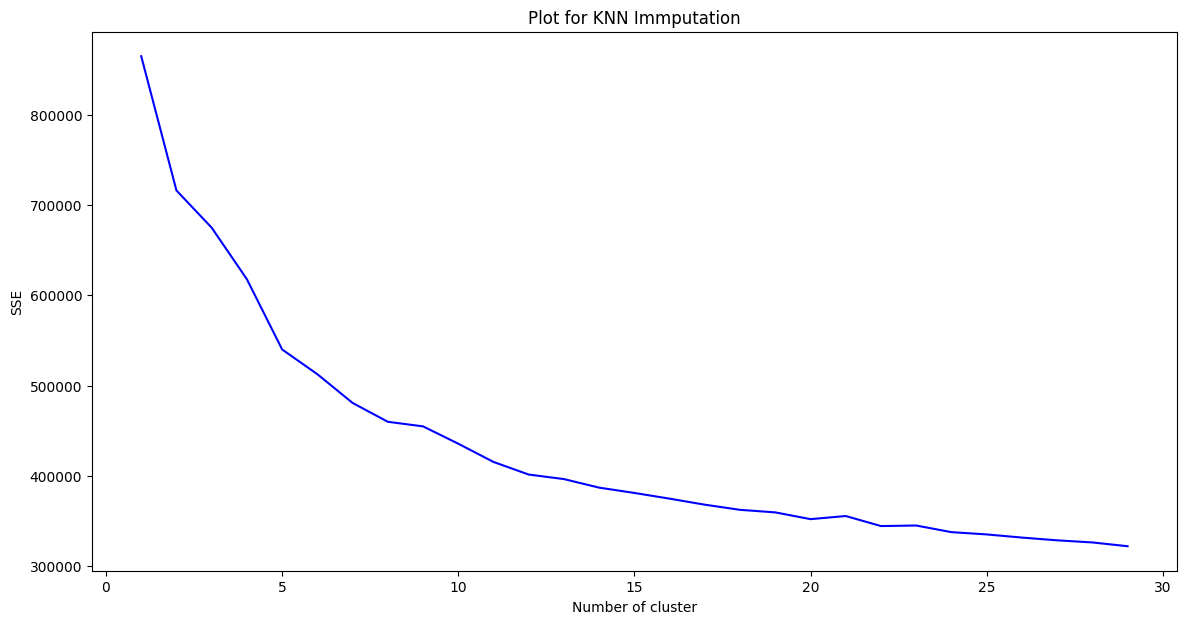

Running for  KNN Imputation with (default) 5 neighbours


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: 

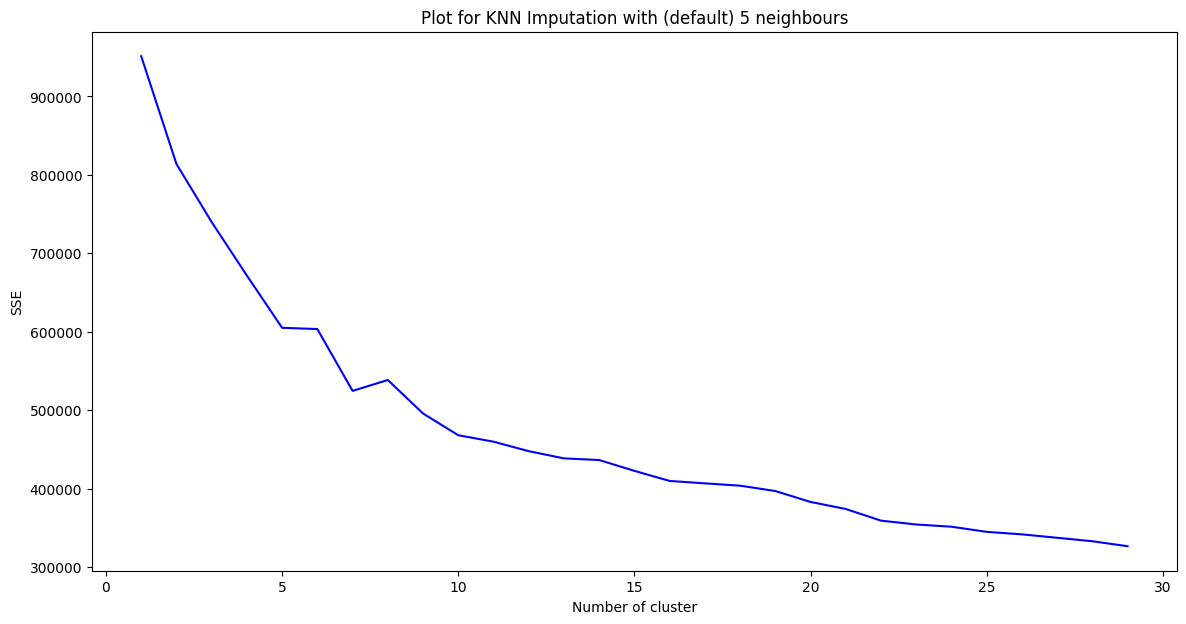

Running for  Mean Imputation 


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: 

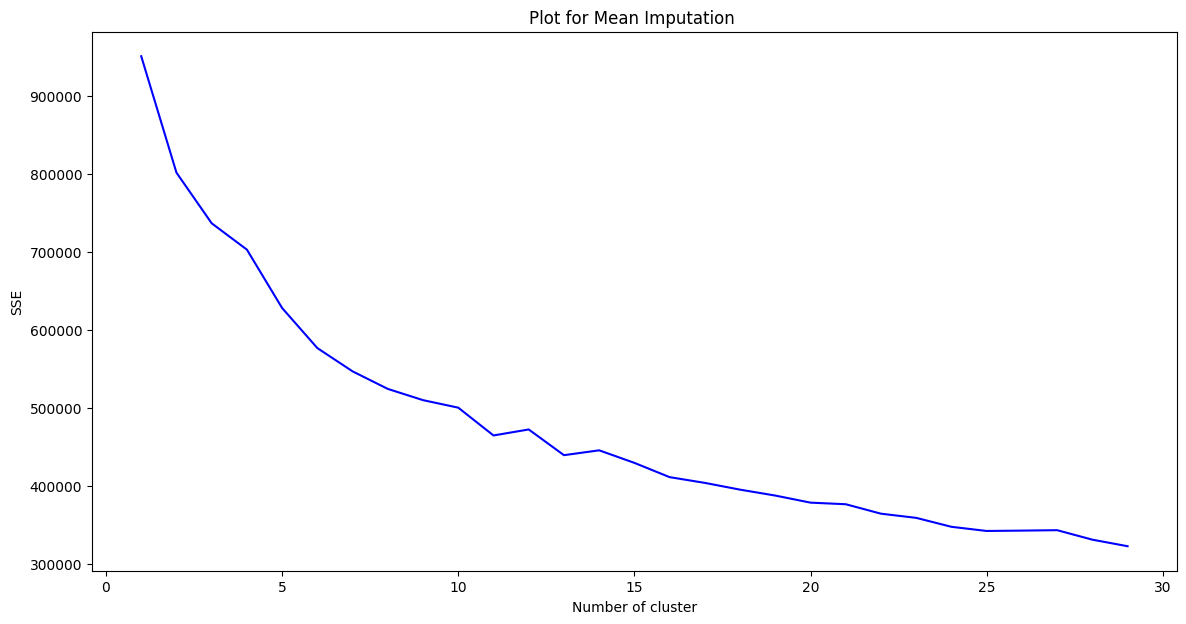

Running for  KNN Immputation + PCA


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: 

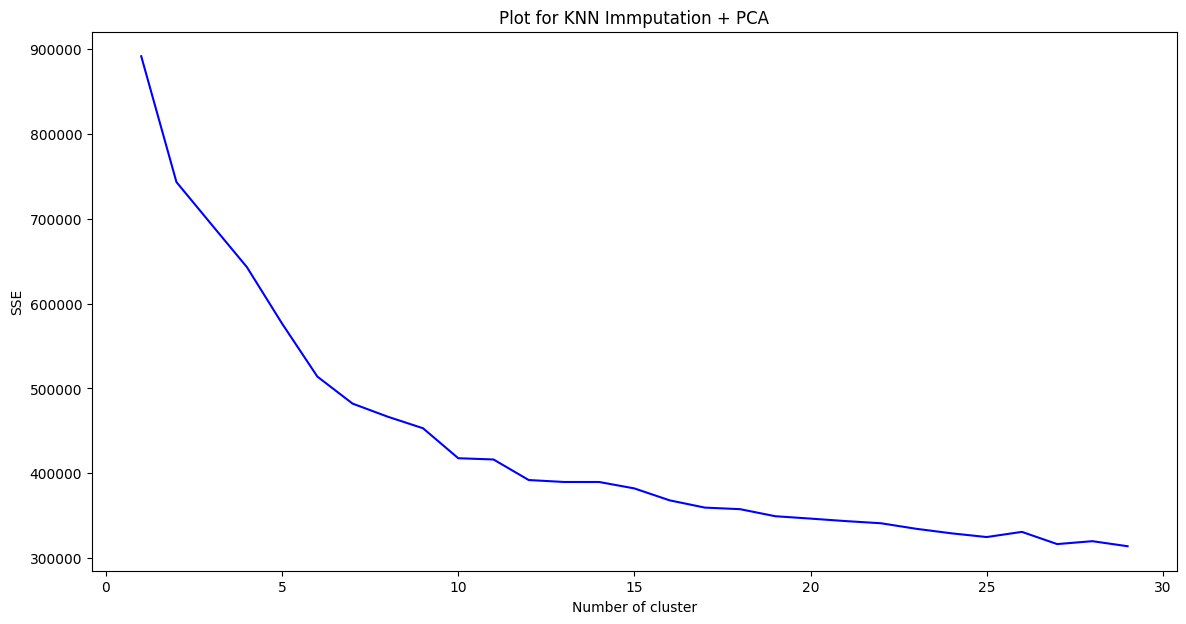

Running for  KNN Imputation Unscaled data


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: 

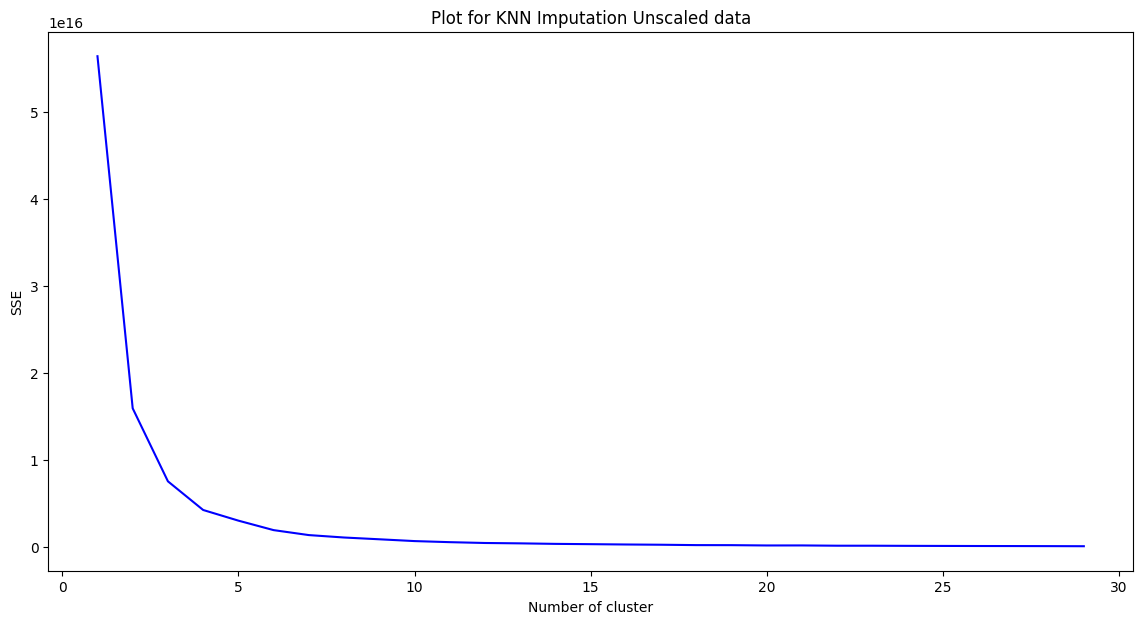

In [79]:
for name,pipeline in [('KNN Immputation',pipe_knn),('KNN Imputation with (default) 5 neighbours',pipe_knn_5),('Mean Imputation ',pipe),
                      ('KNN Immputation + PCA', pipe_knn_pca),('KNN Imputation Unscaled data',pipe_unscaled )]:

    X = pipeline.fit_transform(data)
    X = pd.DataFrame(X)
    if "PCA" not in name :
        X.columns= data.columns

    sse = {}
    #sil_score = {}
    print("Running for ",name)
    for k in range(1, 30):
        #print('K :',k)
        kmeans = MiniBatchKMeans(init="k-means++",n_clusters=k,
                              random_state=0).fit(X)
        label = kmeans.labels_
        data["clusters"] = label
        #print(data["clusters"])
        sse[k] = kmeans.inertia_

        #sil_score[k] = silhouette_score(X, label, metric='euclidean')

    plt.figure(figsize=(14,7))
    plt.plot(list(sse.keys()), list(sse.values()),'b-',label='Sum of squared error')
    plt.xlabel("Number of cluster")
    plt.ylabel("SSE")
    plt.title("Plot for "+name)
    plt.show()




<h2><b>Insights</b></h2>

<table>
<tbody>
<tr style="height: 23px;">
<td style="height: 23px;">Model</td>
<td style="height: 23px;">n_clusters</td>
</tr>
<tr style="height: 23px;">
<td style="height: 23px;">KNN Immputation</td>
<td style="height: 23px;">&nbsp;16</td>
</tr>
<tr style="height: 23px;">
<td style="height: 23px;">KNN Imputation with (default) 5 neighbours</td>
<td style="height: 23px;">&nbsp;20</td>
</tr>
<tr style="height: 23px;">
<td style="height: 23px;">Mean Imputation</td>
<td style="height: 23px;">&nbsp;25</td>
</tr>
<tr style="height: 23px;">
<td style="height: 23px;">KNN Immputation + PCA</td>
<td style="height: 23px;">&nbsp;21</td>
</tr>
<tr style="height: 23.5px;">
<td style="height: 23.5px;">KNN Imputation Unscaled data</td>
<td style="height: 23.5px;">&nbsp;5</td>
</tr>
</tbody>
</table>
<br>
<br>
<b> Number of clusters is around 16-20 for scaled data, while around 5 for unscaled data</b>

In [80]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

<div style="font-family:verdana; word-spacing:1.5px;">
    <p style="text-align:center;font-size:175%;padding: 10px;"><b>Agglomerative Clustering</b></p>
    </div>
    

In [81]:
tmp = X.sample(frac=0.2)

tmp.shape

(17293, 12)

In [82]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram

    dendrogram(linkage_matrix, **kwargs)

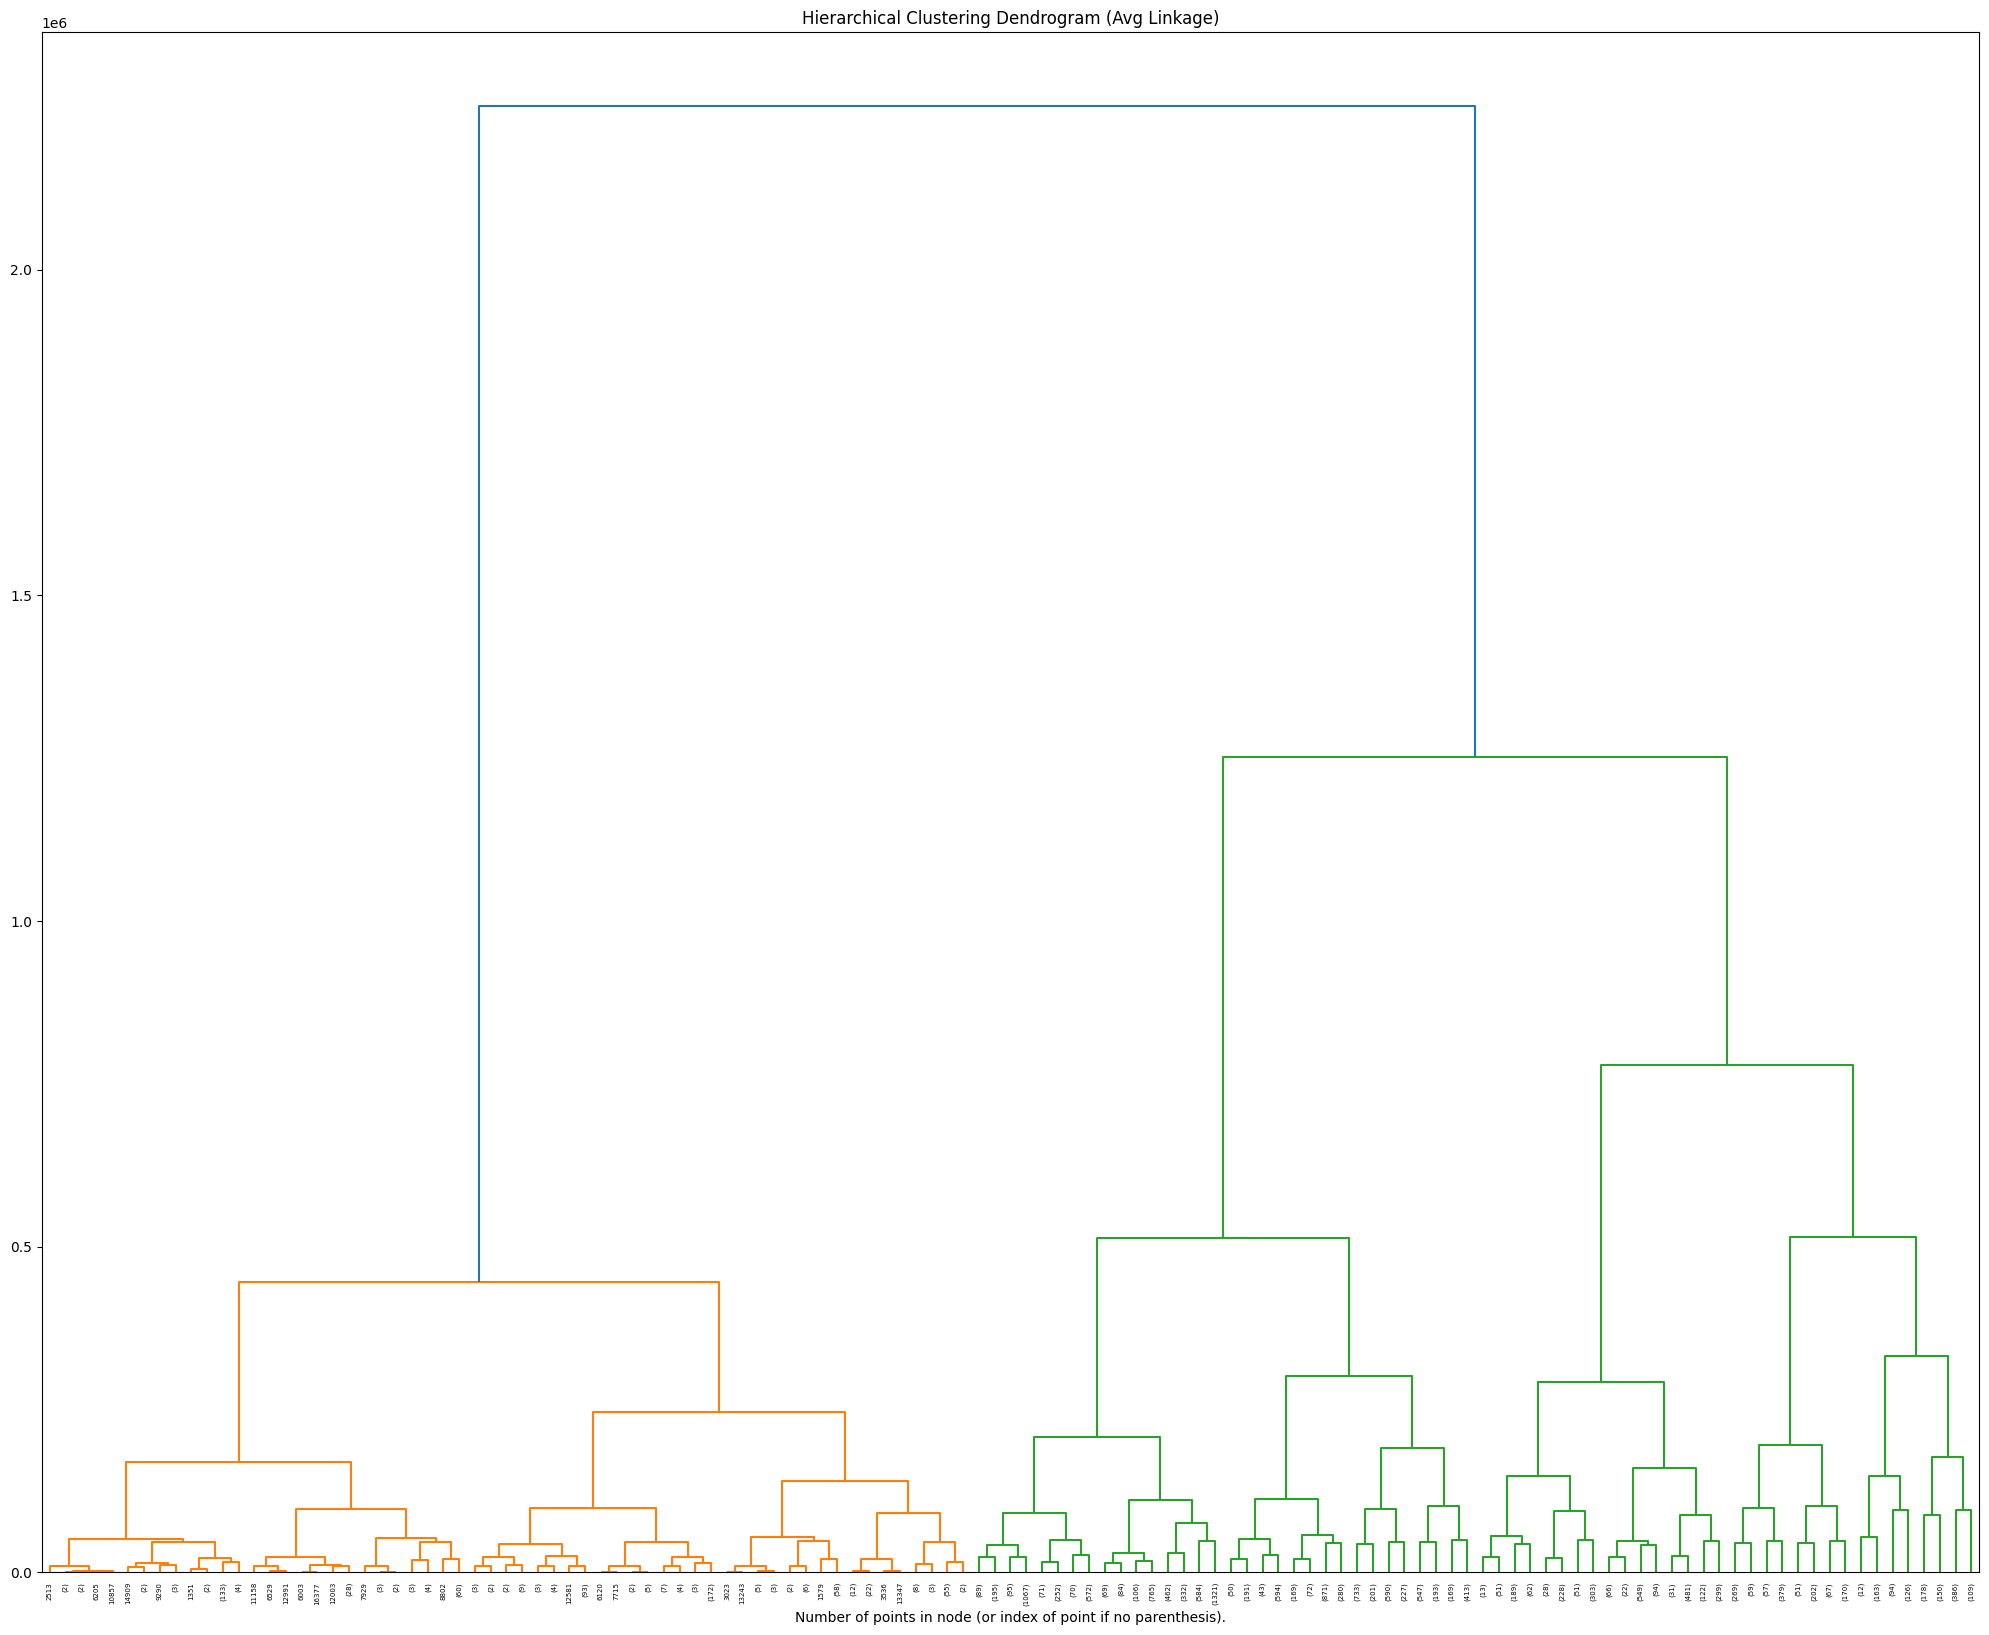

In [83]:

model = AgglomerativeClustering(distance_threshold =0, n_clusters=None, compute_distances=True,linkage='average').fit(tmp)

plt.figure(figsize=(25,20))
plt.title("Hierarchical Clustering Dendrogram (Avg Linkage)")
plot_dendrogram(model, truncate_mode="level", p=6)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

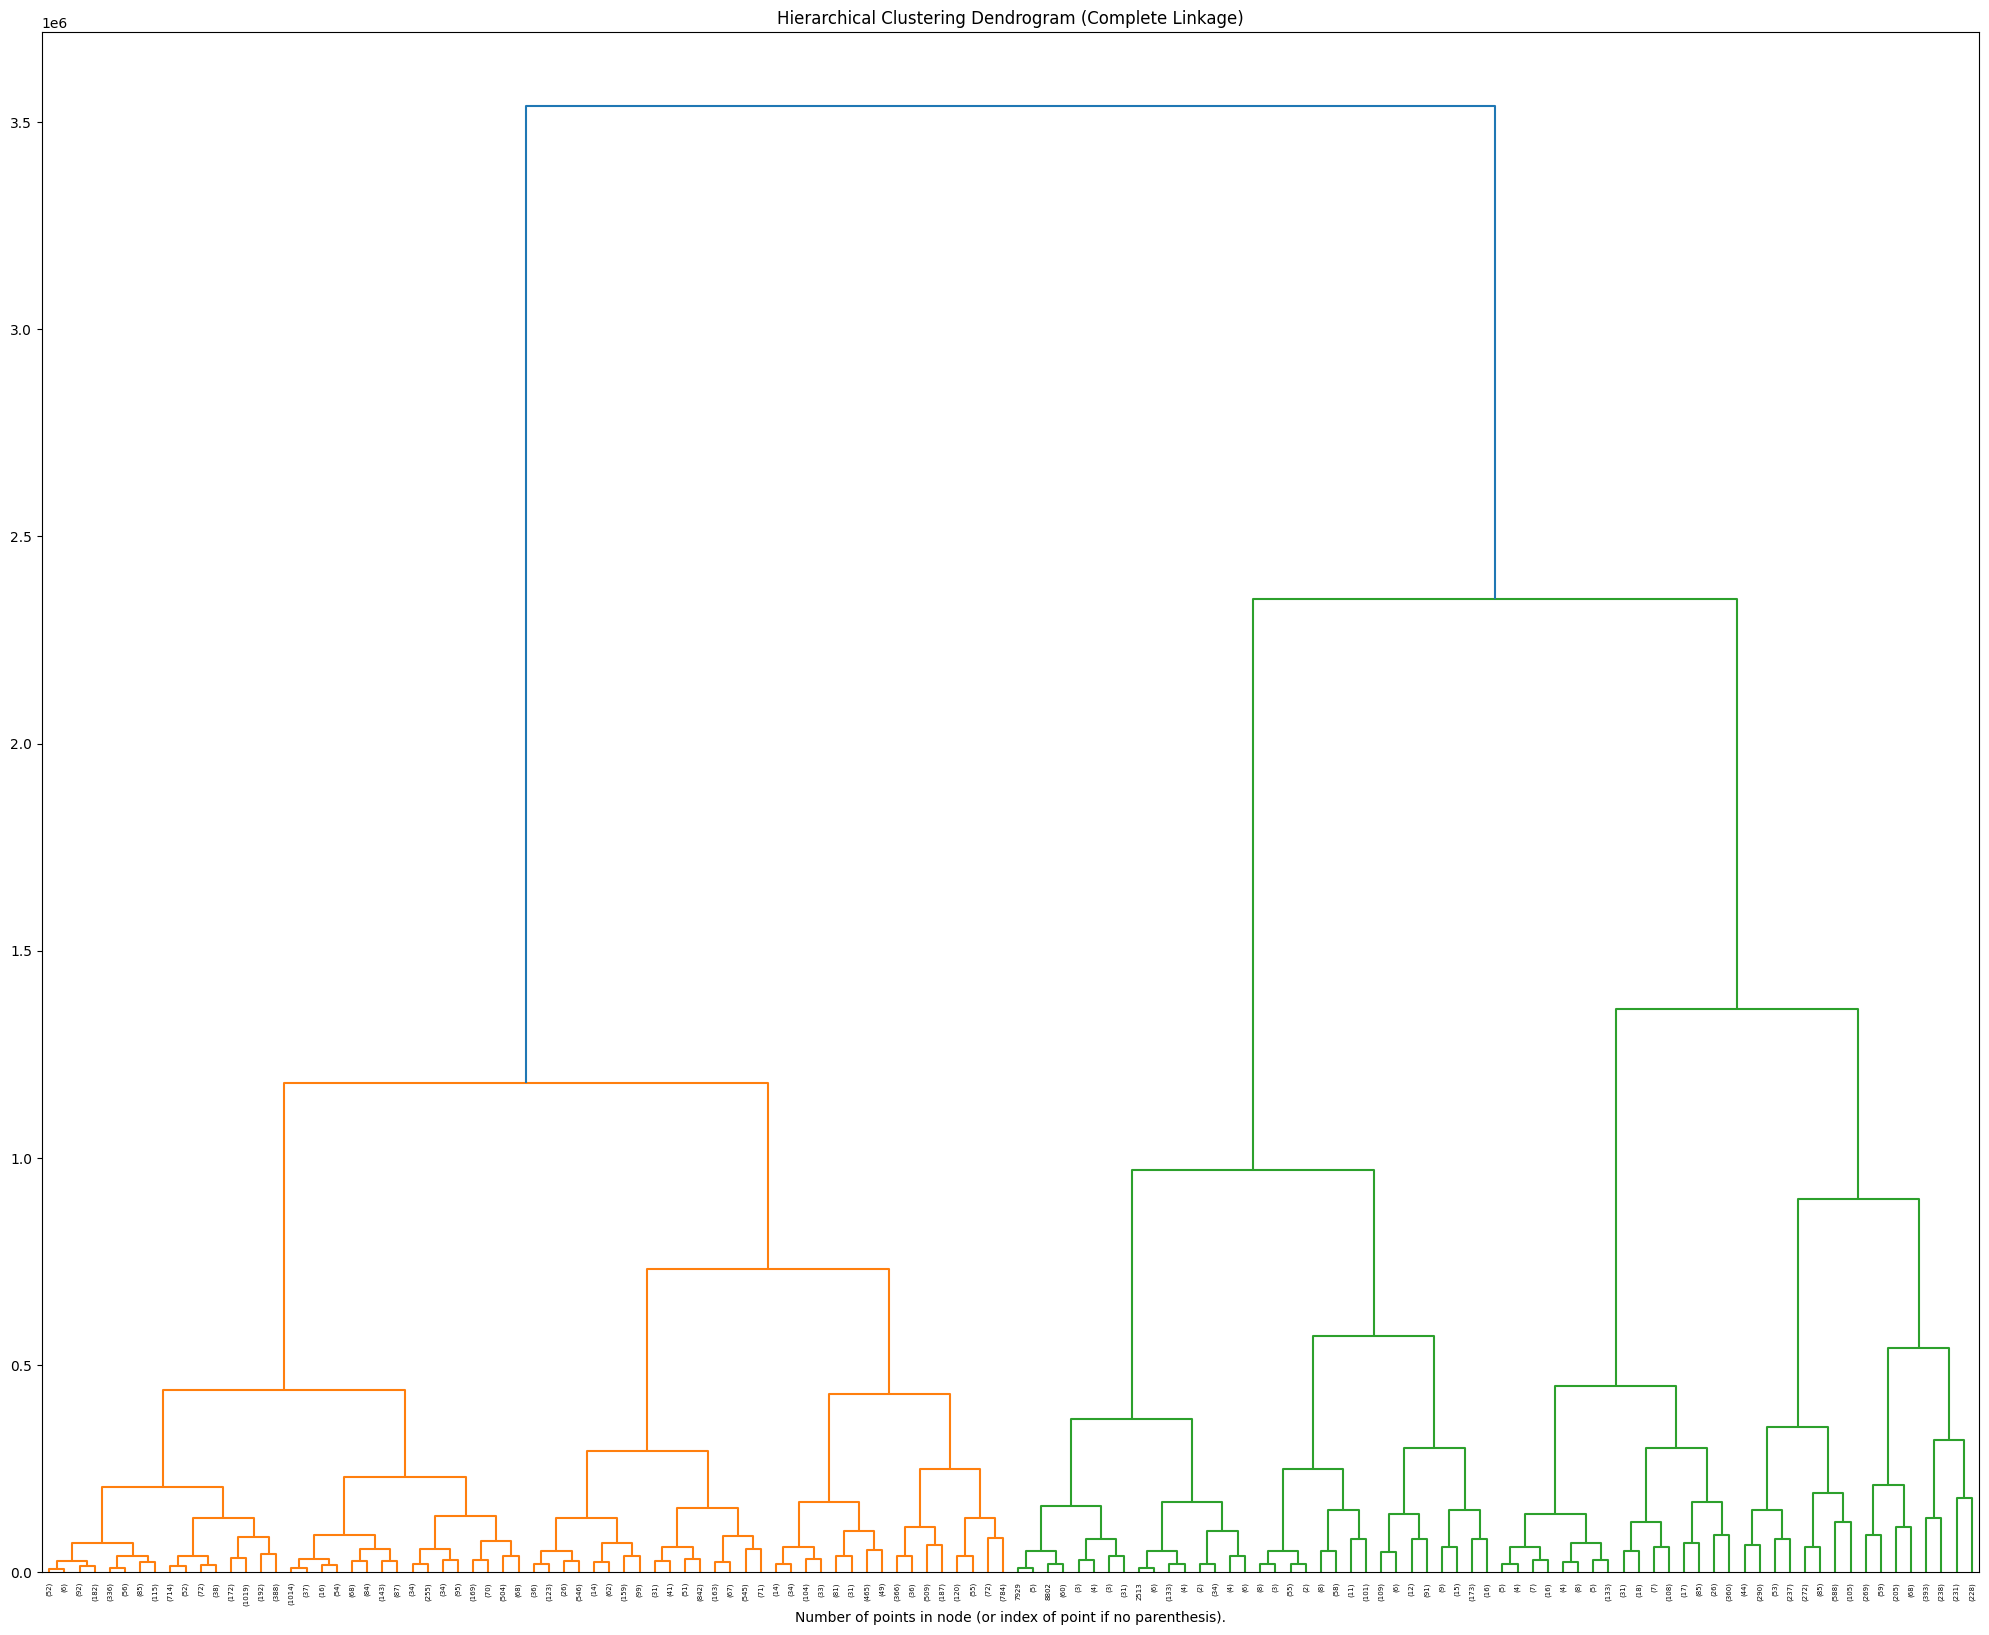

In [84]:

model = AgglomerativeClustering(distance_threshold =0, n_clusters=None, compute_distances=True,linkage='complete').fit(tmp)

plt.figure(figsize=(25,20))
plt.title("Hierarchical Clustering Dendrogram (Complete Linkage)")
plot_dendrogram(model, truncate_mode="level", p=6)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

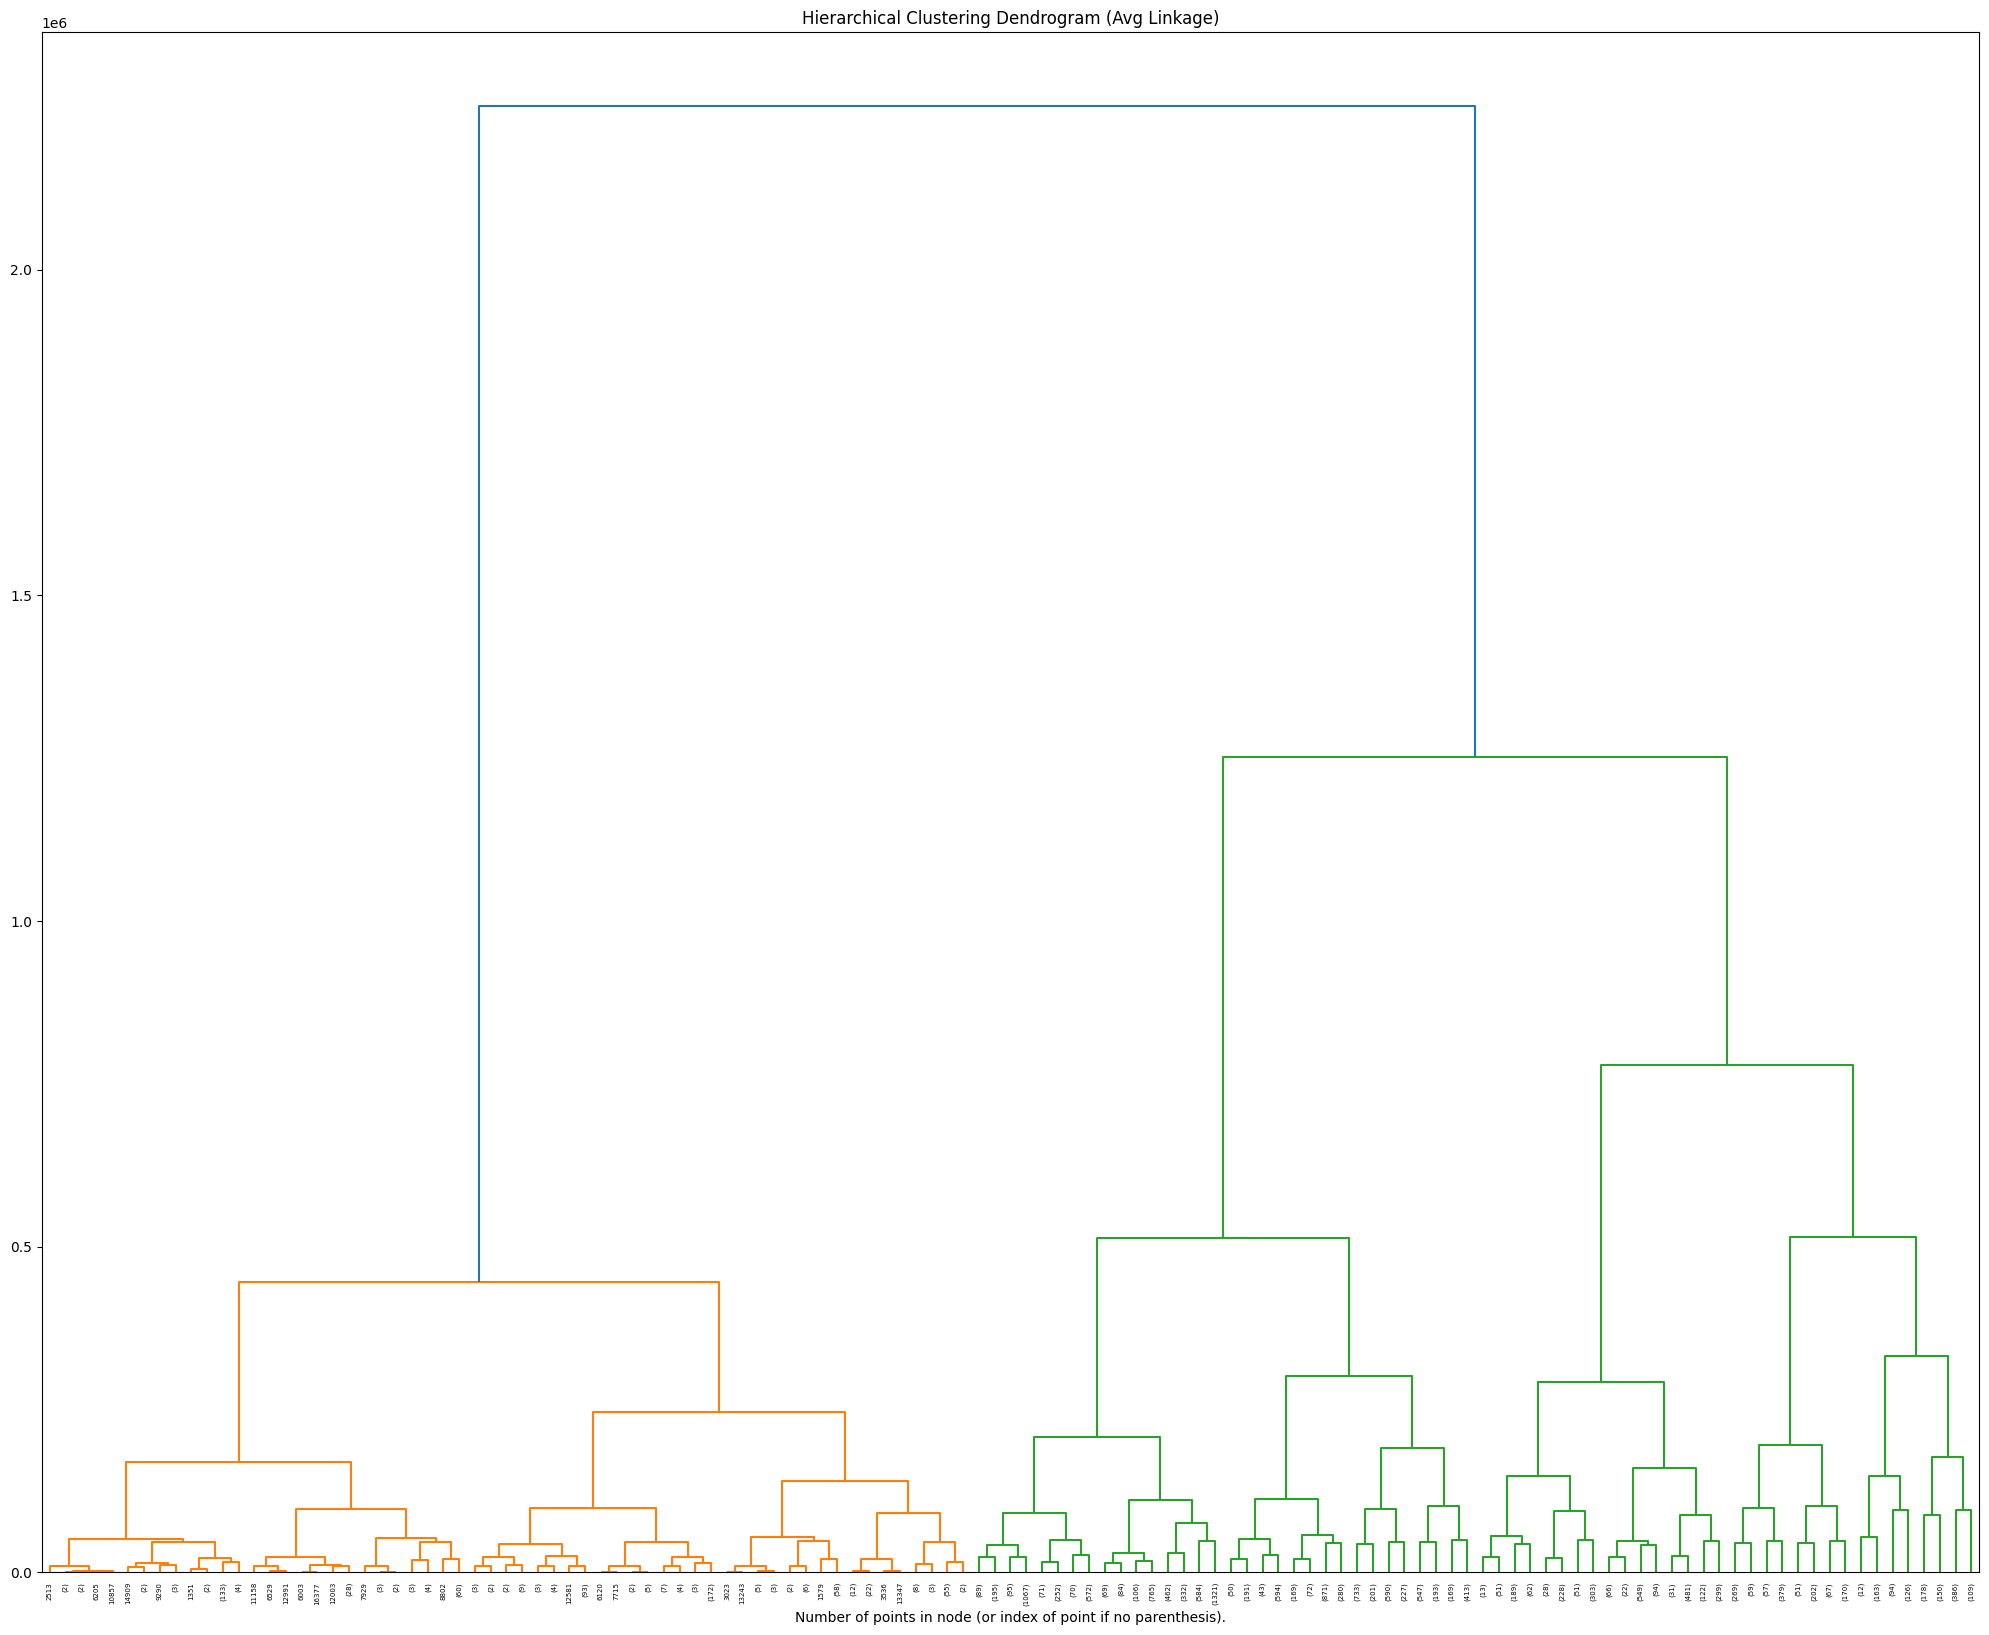

In [85]:

model = AgglomerativeClustering(n_clusters=17, compute_distances=True,linkage='average').fit(tmp)

plt.figure(figsize=(25,20))
plt.title("Hierarchical Clustering Dendrogram (Avg Linkage)")
plot_dendrogram(model, truncate_mode="level", p=6)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

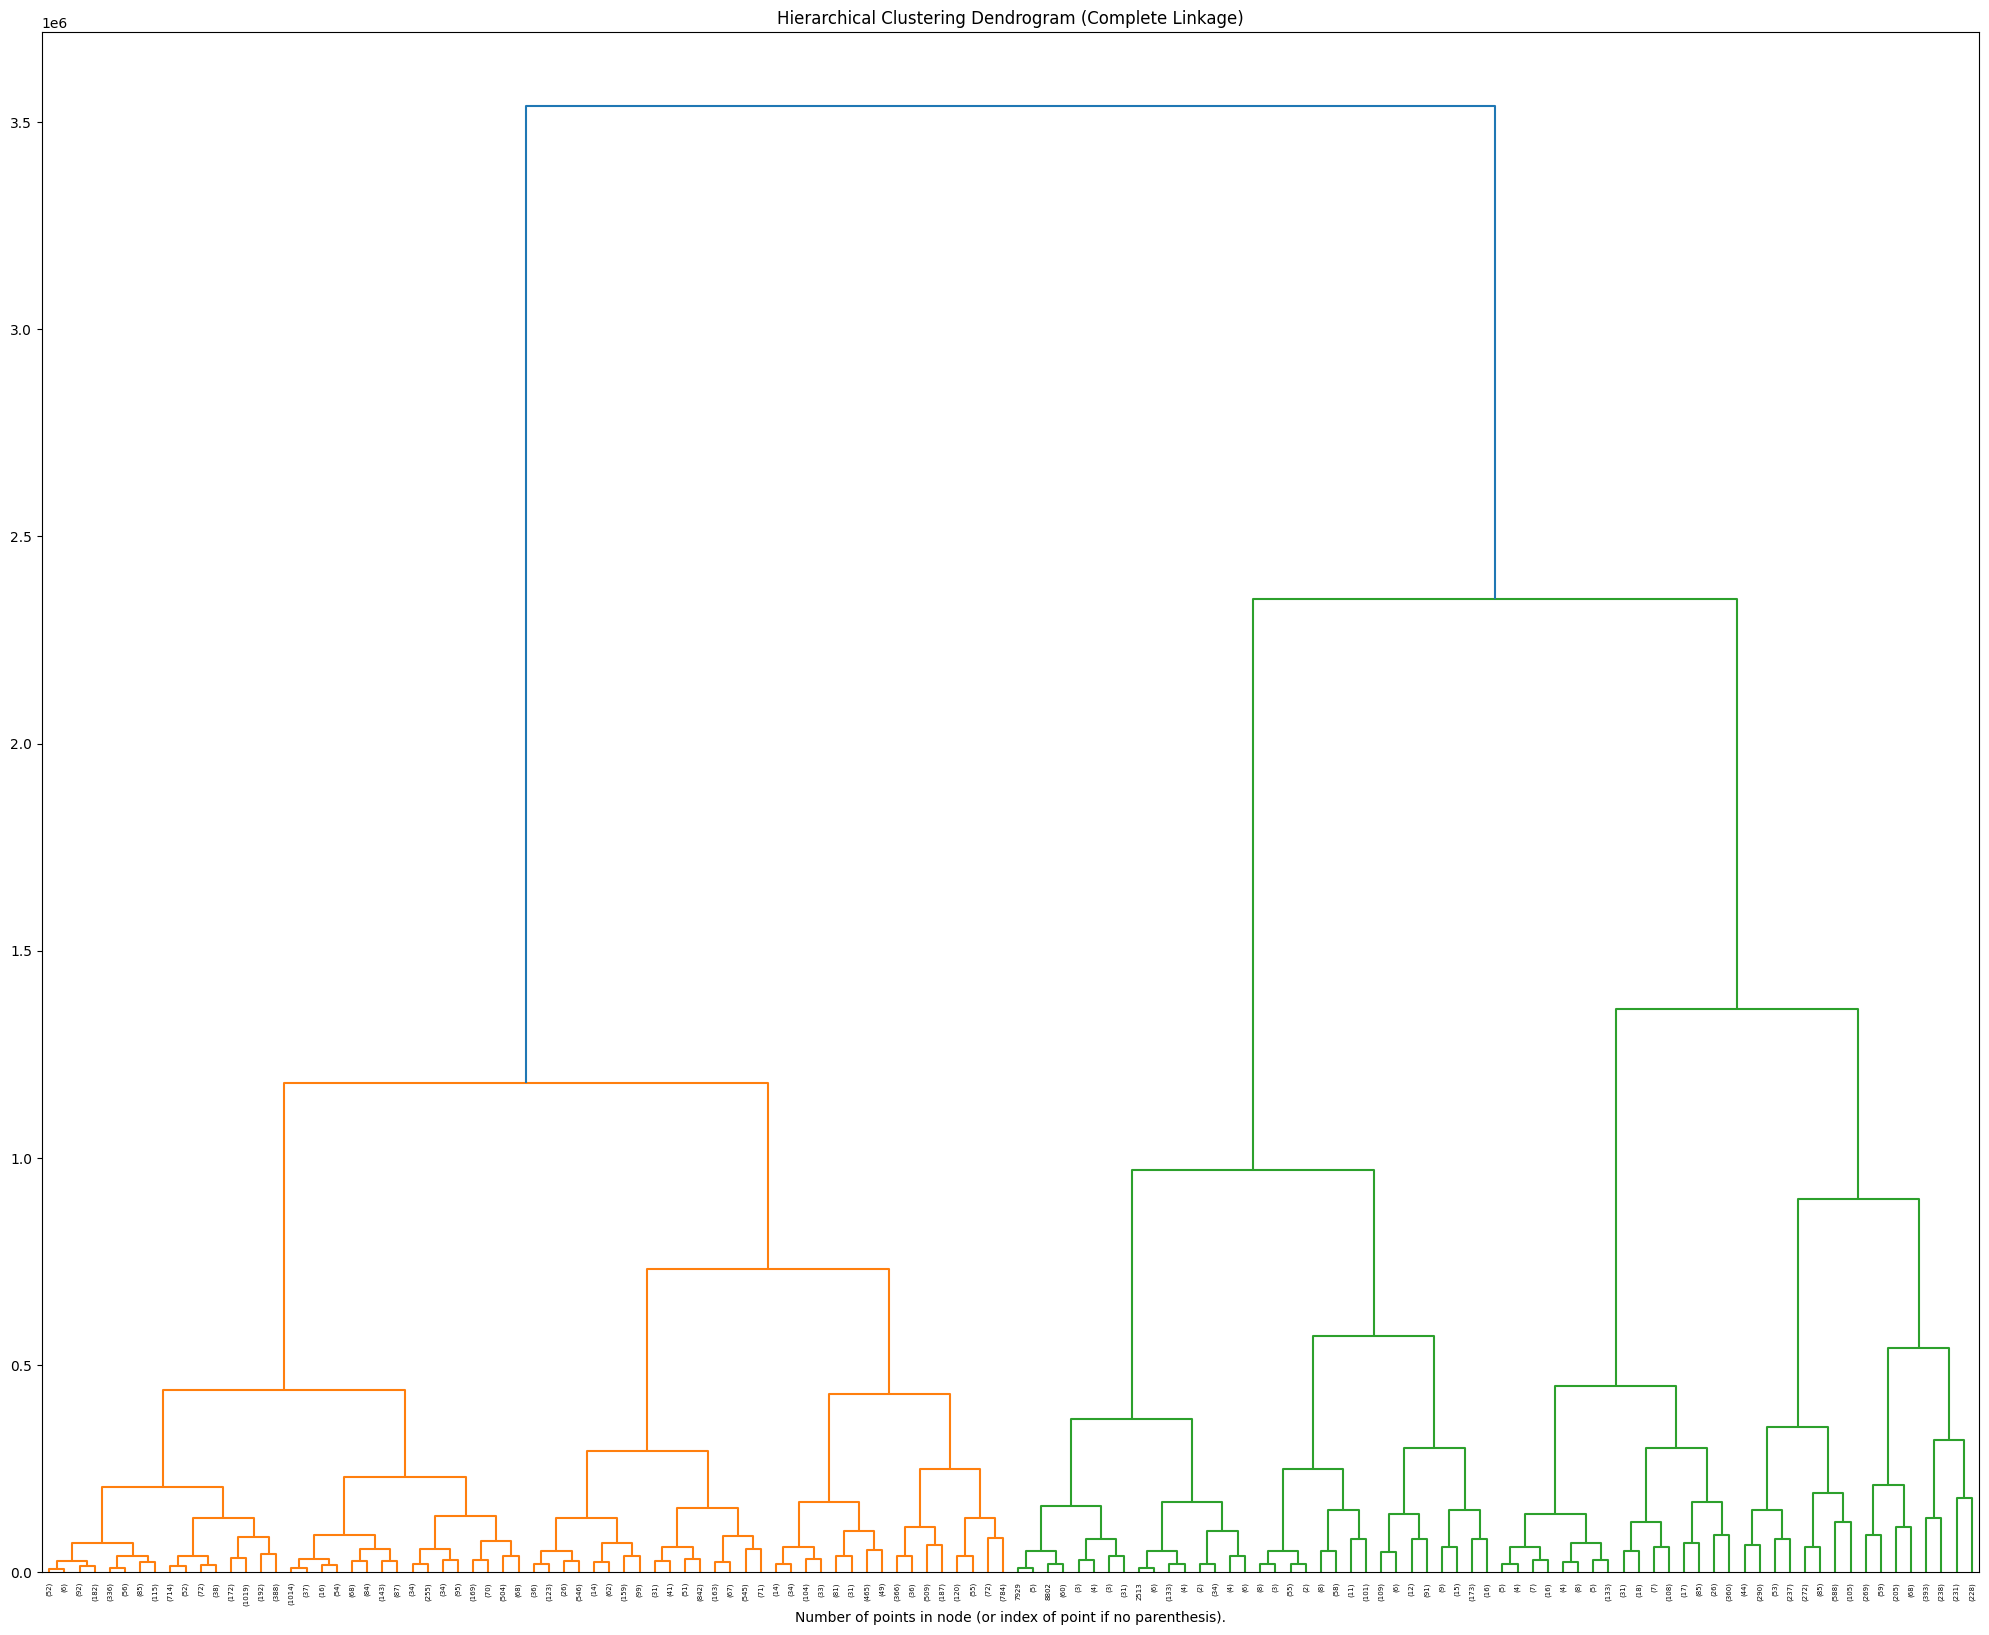

In [86]:

model = AgglomerativeClustering(n_clusters=17, compute_distances=True,linkage='complete').fit(tmp)

plt.figure(figsize=(25,20))
plt.title("Hierarchical Clustering Dendrogram (Complete Linkage)")
plot_dendrogram(model, truncate_mode="level", p=6)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

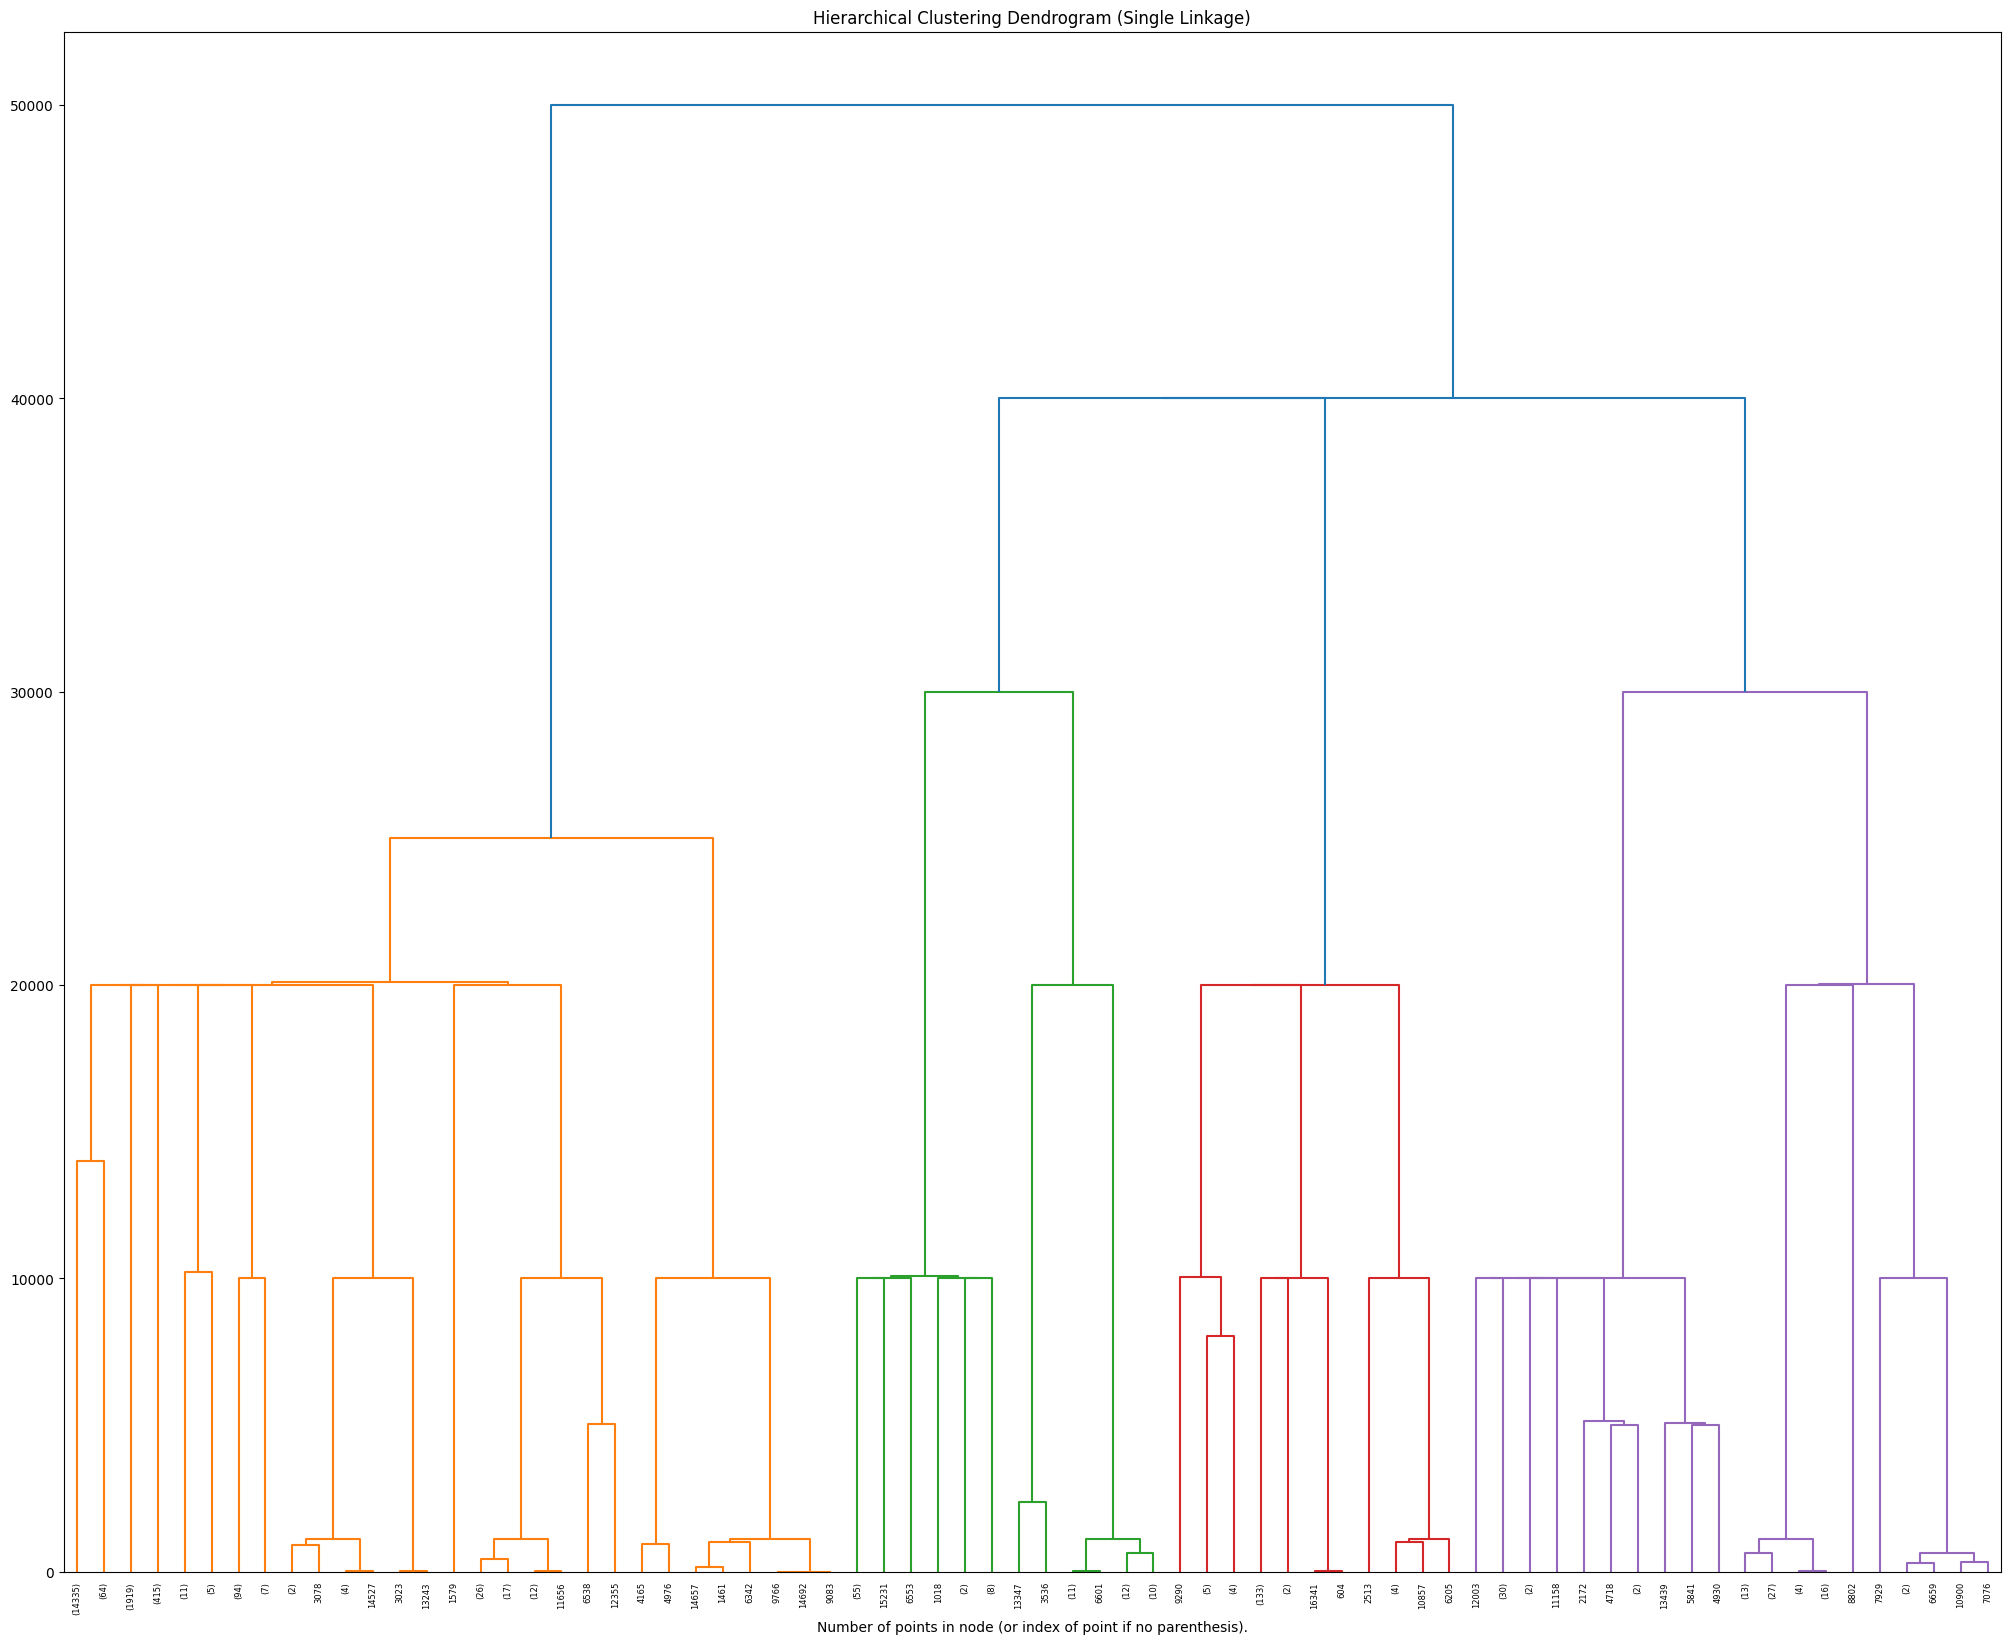

In [87]:

model = AgglomerativeClustering(n_clusters=5, compute_distances=True,linkage='single').fit(tmp)

plt.figure(figsize=(25,20))
plt.title("Hierarchical Clustering Dendrogram (Single Linkage)")
plot_dendrogram(model, truncate_mode="level", p=6)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

<h2><b>Insights</b></h2>


<br><br>
<b> Number of clusters around 2 seems optimal in most cases, while in last plot(with single linkage) number of clusters around 16 is optimal</b>

<div style="font-family:verdana; word-spacing:1.5px;">
<p style="background-color:#33e0ff;color:white;text-align:center;font-size:175%;padding: 10px;">Insights/ Recommendations</p>
</div>    

<b>Insights</b>

<ul>
    <li> Top Paying job titles include 'Engineering Leadership',
 'Backend Engineer',
 'Product Manager',
 'Program Manager',
 'SDET',
 'QA Engineer',
 'Data Scientist',
 'Android Engineer' and
 'FullStack Engineer'.
   Among Top paying companies mean salary for these company is increasing every year, Amazon,Microsoft and Huawei Technologies
          <li> Avg CTC seems to be decreasing with year.

 </ul>

<b>Recommendations</b>

<ul>
<li> Freshers who want to work on technical side should look for roles related to Backend Engineer, SDET, QA engineer, Dataa Scientist, Android Engineer,Full stack engineer to get good salaries as expirience increases.

</ul>
